# Lista 1

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
from numpy import argmin
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler         
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score  

# Functions

In [3]:
def loadData(path, atributos):
  rawData = pd.read_csv(path, sep=' ', header=0)
  rawData.columns = atributos
  return rawData

In [4]:
def predictNN(testData, trainDataX, trainDataY):
  vetorDistancia = []
  ypred = []
  for i in range(len(testData)):
    distancia = 0
    ix = 0
    distancia = np.sqrt(((testData.iloc[[i]].values-trainDataX)**2).sum(1))
    ix = argmin(distancia)
    ypred.append(trainDataY.iloc[ix])
  return ypred

In [5]:
def predictKNN(testData, trainDataX, trainDataY, K):
  vetorDistancia = []
  ypred = []
  for i in range(len(testData)):
    distancia = 0
    ix = 0
    ik = 0
    distancia = np.sqrt(((testData.iloc[[i]].values-trainDataX)**2).sum(1))
    ix = np.argsort(distancia)
    ypredK = trainDataY.iloc[ix[0:K+1]]
    ik = np.bincount(ypredK)
    ikFrequente = np.argmax(ik)
    ypred.append(ikFrequente)
  return ypred

In [6]:
def predictEditKNN(testData, trainDataX, trainDataY, K):
  vetorDistancia = []
  ypred = []
  indicesRemove = []
  trainDataX.reset_index(inplace=True, drop=True)
  trainDataY.reset_index(inplace=True, drop=True)
  for i in range(len(trainDataX)):
    distancia = 0
    ix = 0
    ik = 0
    distancia = np.sqrt(((trainDataX.iloc[[i]].values-trainDataX)**2).sum(1))
    ix = np.argsort(distancia)
    ypredK = trainDataY.iloc[ix[0:K+1]]
    ik = np.bincount(ypredK)
    ikFrequente = np.argmax(ik)
    if trainDataY.iloc[[i]].tolist() == ikFrequente:
      indicesRemove.append(i)
  trainDataX.drop(indicesRemove, axis=0, inplace=True )
  trainDataY.drop(indicesRemove, inplace=True )
  editTrainDataX = trainDataX
  editTrainDataY = trainDataY
  for j in range(len(testData)):
    distancia = 0
    ix = 0
    ik = 0
    
    distancia = np.sqrt(((testData.iloc[[j]].values-editTrainDataX)**2).sum(1))
    
    ix = np.argsort(distancia)
    
    ypredK = editTrainDataY.iloc[ix[0:K+1]]
    
    ik = np.bincount(ypredK)
    
    ikFrequenteE = np.argmax(ik)

    ypred.append(ikFrequenteE)
   
  return ypred

In [63]:
def getCentroide(trainDataScaled, trainDataY):
  # Centroide
  centroide = []
  cont=0
  nclasses = trainDataY.value_counts()
  len(nclasses)
  for c in range(1,5):
    rowsIndexClass = trainDataScaled.index[trainDataY==c]
    trainDataScaled.loc[(rowsIndexClass)]
    medias = np.mean(trainDataScaled.loc[(rowsIndexClass)])
    centroide.append([medias])
  return centroide

In [62]:
def predictRocchio(testData, centroide):
  vetorDistancia = []
  simulado = []
  for i in range(len(testData)):
    distancia = []
    ix = 0
    for j in range(0,4):
      distancia.append(np.sqrt(((testData.iloc[[i]].values-centroide[j])**2).sum(1)))
    ix = argmin(distancia)
    simulado.append(ix+1)
  return simulado

In [96]:
def getConfusionMatrix(real, predict):
  # Confusion Matrix
  Real = real
  conf_matrix = confusion_matrix(Real, predict)
  plt.figure(figsize=(6, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()
  return conf_matrix

In [10]:
def getPreProcessData(rawData, sigma):
  DataFilt = rawData
  outIndexT = rawData.index[rawData[atributos[2]]<0]
  std = 0
  for i in range(2,8):
    std = np.std(rawData[atributos[i]])
    outIndex = (rawData.index[rawData[atributos[i]]<0])
    outIndexSigma = (rawData.index[rawData[atributos[i]]>(sigma*std)])
    outIndex = outIndex.union(outIndexSigma)
    outIndexT = outIndexT.union(outIndex)
  DataFilt = DataFilt.drop(index=outIndexT)
  DataFilt = DataFilt.dropna()
  DataFilt = DataFilt.drop_duplicates()
  return DataFilt

In [11]:
def pca(inputX, nDim=2, varianceRatio=None):
  X = np.array(inputX)
  (n, d) = X.shape
  vetorPrincipais = []
  sumVariance = 0
  k=0
  mean_vec = np.mean(X, axis=0)
  X = X - mean_vec
  (autovalores, autovetores) = np.linalg.eig(np.dot(X.T, X))
  pares_de_autos = [(np.abs(autovalores[i]),autovetores[:,i]) for i in range(len(autovalores))]
  dfPrincipalComponents = pd.DataFrame(data=pares_de_autos, columns=['autovalores', 'autovetores'])
  Y = np.dot(X, np.transpose([(dfPrincipalComponents['autovetores'][i]) for i in range(0,nDim)]))
  total = np.sum(dfPrincipalComponents['autovalores'])
  dfPrincipalComponents['autovalores'] = (dfPrincipalComponents['autovalores'])/total
  if varianceRatio != None:
    while sumVariance <= varianceRatio:
      k=k+1
      sumVariance = dfPrincipalComponents['autovalores'].iloc[0:k].sum()
    print(str(k)+' Componentes correspondem a '+str(np.round(sumVariance,3)*100)+'% da informação de variancia dos dados')
  dfY = pd.DataFrame(data = Y
              , columns = range(0,nDim))
  return dfY, dfPrincipalComponents, Y, k

In [12]:
def linearRegretionEstimation(x,t):
  xm = np.mean(x)
  tm = np.mean(t)
  w1 = (np.mean(x*t)-(xm*tm))/(np.mean(x**2)-(xm**2))
  w0 = tm - w1*xm
  print(w0)
  print(w1)
  return (w0, w1)

In [13]:
# multivariate linear regression
def estimateMultiLinearRegressionFit(x,t):
  x1 = np.ones(x.shape[0])
  x.insert(0,"1",x1,True)
  x = np.array(x)
  t = np.array(t)
  w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(t)
  print('---------------------')
  print('Estimation Param: ', w)
  print('---------------------')
  return w

In [14]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [15]:
#  Acuracia
def getAcuracia(ytest, ypredict):
  cm = confusion_matrix(ytest, ypredict)
  sum = 0
  for i in range(cm.shape[0]):
      sum += cm[i][i]
  accuracy = sum/ytest.shape[0]
  # print('Acuracia: ', accuracy)
  # print('-----------------')
  return accuracy

In [16]:
def getRecall(ytest, ypredict):
  from sklearn.metrics import recall_score
  recall = recall_score(ytest, ypredict,average = 'macro')
  # print('Recall: ', recall)
  # print('-----------------')
  return recall

In [17]:
def getPrecision(ytest, ypredict):
  from sklearn.metrics import precision_score
  precision = precision_score(ytest, ypredict, average = 'macro')
  # print('Precision: ', precision)
  # print('-----------------')
  return precision

In [18]:
def RMSE(pred, t):
  rmse = np.sqrt((np.sum((t - pred)**2))/(np.size(t)))
  return rmse

In [19]:
def MAPE(pred,t):
  mape = (np.sum(abs((t - pred)/t)))/(np.size(t))
  return mape*100

In [20]:
def QME(pred, t, p):
  qme = (np.sum((t-pred)**2))/(np.size(t)-p)
  return qme

In [21]:
def R2(pred, t):
  r2 = 1-((np.sum((t-pred)**2))/(np.sum((t-np.mean(t))**2)))
  return r2

In [23]:
def testF(X_test, t, w, N):
  Fref = 3.908
  arrayF = []
  columns = np.full(np.size(w), True, dtype=bool)
  pred = X_test.dot(w)
  RSS = np.sum((t-pred)**2) 
  indice = np.arange(0,len(w),1)
  for i in range(len(w)):
    indiceEx = indice
    col_= X_test.columns.tolist()
    arrayCol = np.array(col_)
    indiceEx = np.delete(indice,[i],axis=0)
    pred0 = X_test[arrayCol[indiceEx]].dot(w[indiceEx])
    RSS0 = np.sum((t-pred0)**2) 
    F = ((RSS0-RSS)/(1))/(RSS/(N-np.size(w)-1))
    arrayF = np.append(arrayF,F)
    if F < Fref:
      columns[i] = True
    else:
      columns[i] = False 
  
  return arrayF, columns

----------

# Ex1.a Classificação sem Processamento

In [296]:
pathTrain = '/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/base/nebulosa_train.csv'
pathTest = '/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/base/nebulosa_test.txt'
atributos = ['ID',
            'Nome',
            'PorteFisico',
            'NivelEducacional',
            'NivelSocioEconomico',
            'Epoca',
            'Idade',
            'class']


In [327]:
def getCentroide(trainDataScaled, trainDataY):
  # Centroide
  centroide = []
  cont=0
  nclasses = trainDataY.value_counts()
  len(nclasses)
  for c in range(1,4):
    rowsIndexClass = trainDataScaled.index[trainDataY==c]
    trainDataScaled.loc[(rowsIndexClass)]
    medias = np.mean(trainDataScaled.loc[(rowsIndexClass)])
    centroide.append([medias])
  return centroide

In [328]:
def predictRocchio(testData, centroide):
  vetorDistancia = []
  simulado = []
  for i in range(len(testData)):
    distancia = []
    ix = 0
    for j in range(0,3):
      distancia.append(np.sqrt(((testData.iloc[[i]].values-centroide[j])**2).sum(1)))
    ix = argmin(distancia)
    simulado.append(ix+1)
  return simulado

##NN - Dados Brutos

In [297]:
#Load Train Data
nebulosaTrain = loadData(pathTrain, atributos)
#Load Test Data
nebulosaTest = loadData(pathTest, atributos)

In [298]:
#  Removendo amostras com dados incompletos
#  Get indexes where values column has value -100
indexDrop = nebulosaTrain[nebulosaTrain.values == -100].index
nebulosaTrain.drop(indexDrop, inplace=True)
#  Removendo amostras com dados incompletos
#  Get indexes where values column has value -100
indexDropTest = nebulosaTest[nebulosaTest.values == -100].index
nebulosaTest.drop(indexDropTest, inplace=True)

In [299]:
#  Remove categorical columns
nebulosaTrainX = nebulosaTrain.drop(['ID', 'Nome', 'class'],axis=1)
nebulosaTestX = nebulosaTest.drop(['ID', 'Nome', 'class'],axis=1)

In [300]:
# Normaliza os dados treinamento
nebulosaTrainScaled=(nebulosaTrainX-nebulosaTrainX.min())/(nebulosaTrainX.max()-nebulosaTrainX.min())
# Normaliza os dados teste
nebulosaTestScaled=(nebulosaTestX-nebulosaTrainX.min())/(nebulosaTrainX.max()-nebulosaTrainX.min())

In [301]:
trainDataY = nebulosaTrain['class']

In [ ]:
# Calcular a menor distancia do ponto - NN
simulado = predictNN(nebulosaTestScaled,nebulosaTrainScaled, trainDataY)

In [ ]:
#  Acuracia
print('-----------------')
print('Acuracia NN Sem processamento: ', getAcuracia(nebulosaTest['class'].values, simulado))

-----------------
Acuracia NN Sem processamento:  0.7083333333333334


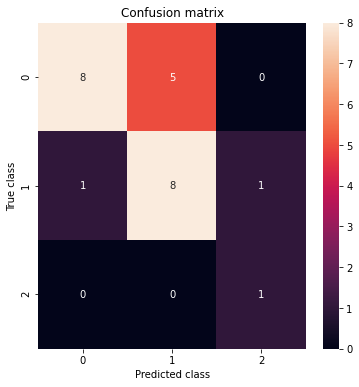

In [ ]:
# Confusion Matrix
getConfusionMatrix(nebulosaTest['class'].values, simulado)

##Rocchio - Dados Brutos

In [302]:
#Load Train Data
nebulosaTrain = loadData(pathTrain, atributos)
#Load Test Data
nebulosaTest = loadData(pathTest, atributos)

In [303]:
#  Removendo amostras com dados incompletos
#  Get indexes where values column has value -100
indexDrop = nebulosaTrain[nebulosaTrain.values == -100].index
nebulosaTrain.drop(indexDrop, inplace=True)
#  Get indexes where values column has value -100
indexDropTest = nebulosaTest[nebulosaTest.values == -100].index
nebulosaTest.drop(indexDropTest, inplace=True)

In [214]:
#  Remove categorical columns
nebulosaTrainX = nebulosaTrain.drop(['ID', 'Nome', 'class'],axis=1)
nebulosaTestX = nebulosaTest.drop(['ID', 'Nome', 'class'],axis=1)

In [215]:
# Normaliza os dados treinamento
nebulosaTrainScaled=(nebulosaTrainX-nebulosaTrainX.min())/(nebulosaTrainX.max()-nebulosaTrainX.min())
# Normaliza os dados teste
nebulosaTestScaled=(nebulosaTestX-nebulosaTrainX.min())/(nebulosaTrainX.max()-nebulosaTrainX.min())

In [216]:
trainDataY = nebulosaTrain['class']

In [217]:
centroide = getCentroide(nebulosaTrainScaled, trainDataY)

In [185]:
simuladoRocchio = predictRocchio(nebulosaTestScaled, centroide)

In [191]:
#  Acuracia Rocchio
print('-----------------')
print('Acuracia Rocchio Sem processamento: ', getAcuracia(nebulosaTest['class'].values, simuladoRocchio))

-----------------
Acuracia Rocchio Sem processamento:  0.4583333333333333


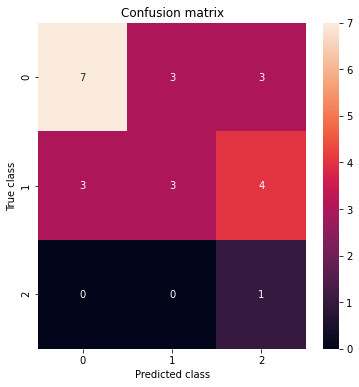

array([[7, 3, 3],
       [3, 3, 4],
       [0, 0, 1]])

In [192]:
getConfusionMatrix(nebulosaTest['class'].values, simuladoRocchio)

#EX1.b - Pré Processamento dos Dados

In [304]:
#Load Train Data
nebulosaTrain = loadData(pathTrain, atributos)
#Load Test Data
nebulosaTest = loadData(pathTest, atributos)


Filter data

In [314]:
nebulosaTrainFilt = getPreProcessData(nebulosaTrain, 4)
nebulosaTestFilt = getPreProcessData(nebulosaTest, 10)

Remove Categorical inputs

In [315]:
#  Remove columns ID and Name
nebulosaTrainFilt = nebulosaTrainFilt.drop(['ID', 'Nome'],axis=1)
#  Remove columns ID and Name
nebulosaTestFilt = nebulosaTestFilt.drop(['ID', 'Nome'],axis=1)

In [316]:
# Remove Class
nebulosaTrainX = nebulosaTrainFilt.drop(['class',atributos[2]],axis=1)

In [317]:
# Remove Class
nebulosaTestX = nebulosaTestFilt.drop(['class',atributos[2]],axis=1)

Normalize Data

In [318]:
# Normaliza os dados treinamento
nebulosaTrainScaled=(nebulosaTrainX-nebulosaTrainX.min())/(nebulosaTrainX.max()-nebulosaTrainX.min())
# Normaliza os dados teste
nebulosaTestScaled=(nebulosaTestX-nebulosaTrainX.min())/(nebulosaTrainX.max()-nebulosaTrainX.min())

In [319]:
trainDataY = nebulosaTrainFilt['class']

###NN - Dados Processados

In [320]:
# Calcular a menor distancia do ponto - NN
simulado = predictNN(nebulosaTestScaled,nebulosaTrainScaled, trainDataY)

In [321]:
#  Acuracia
print('-----------------')
print('Acuracia: ', accuracy_score(nebulosaTestFilt['class'].values, simulado))

-----------------
Acuracia:  0.8333333333333334


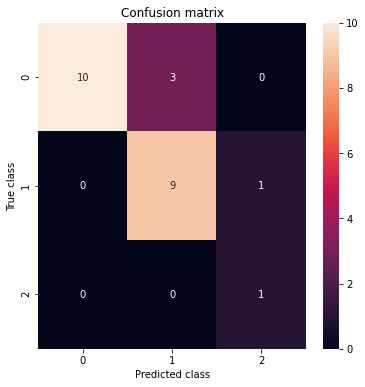

array([[10,  3,  0],
       [ 0,  9,  1],
       [ 0,  0,  1]])

In [322]:
# Confusion Matrix
getConfusionMatrix(nebulosaTestFilt['class'].values, simulado)

### Rocchio - Dados Processados

In [329]:
centroide = getCentroide(nebulosaTrainScaled, trainDataY)

In [330]:
# Calcular a menor distancia do ponto
simulado = predictRocchio(nebulosaTestScaled,centroide)

In [331]:
#  Acuracia
print('-----------------')
print('Acuracia: ', getAcuracia(nebulosaTestFilt['class'].values, simulado))

-----------------
Acuracia:  0.4583333333333333


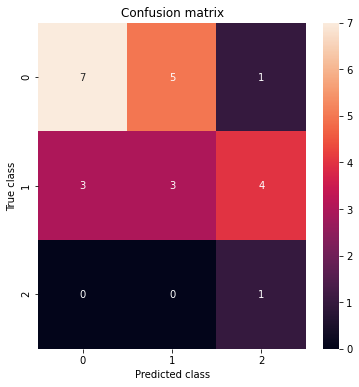

array([[7, 5, 1],
       [3, 3, 4],
       [0, 0, 1]])

In [332]:
# Confusion Matrix
getConfusionMatrix(nebulosaTestFilt['class'].values, simulado)

# Ex2.a - PCA - CNAE_9_Reduzido

In [362]:
pathCNAE = '/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/base/CNAE_9_reduzido.txt'
dfCNAE = pd.read_csv(pathCNAE, sep=' ', header=None)

In [363]:
cnaeClass = pd.DataFrame(data=dfCNAE[0].values, columns=['class'])

In [364]:
dfCNAE = dfCNAE.drop([0],axis=1)

In [365]:
# média por coluna de X
mean_vec = np.mean(dfCNAE, axis=0)

In [366]:
# subtraindo a média da respectiva coluna de X
dfCNAE = dfCNAE - mean_vec

In [367]:
# calculando matriz de covariância
covMatrix = np.dot(dfCNAE.T,dfCNAE)# / (dfCNAE.shape[0]-1)
# covMatrix = np.cov(dfCNAE)

In [368]:
# determinando auto-valores e auto-vetores
(autovalores, autovetores) = np.linalg.eig(np.dot(dfCNAE.T, dfCNAE))

In [369]:
# ordenando em ordem descrecente
pares_de_autos = [(np.abs(autovalores[i]),autovetores[:,i]) for i in range(len(autovalores))]
dfPrincipalComponents = pd.DataFrame(data=pares_de_autos, columns=['autovalores', 'autovetores'])
dfPrincipalComponents.sort_values(by='autovalores', ascending=False)

,autovalores,autovetores
0,4.049620e+02,"[(0.0012616512842690125+0j), (0.00130532092134..."
1,3.139988e+02,"[(-0.0003651848231265473+0j), (0.0014482828830..."
2,2.109692e+02,"[(0.0019783033137018235+0j), (0.00172673708168..."
3,1.928123e+02,"[(-0.0037802524198518182+0j), (-0.001111786609..."
4,1.627946e+02,"[(0.0011808045699478306+0j), (-0.0007751920140..."
...,...,...
497,2.441134e-32,"[(-0.0005324250354103782+0j), (9.8044114429539..."
500,2.118048e-32,[(8.985422978083941e-05-0.00034912625781762923...
501,2.118048e-32,[(8.985422978083941e-05+0.00034912625781762923...
498,1.679313e-32,[(0.0002426754861262092-0.0003671905414561936j...


In [370]:
dfY, dfPrincipalComponents, Y, k = pca(dfCNAE)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order

<Figure size 432x288 with 0 Axes>

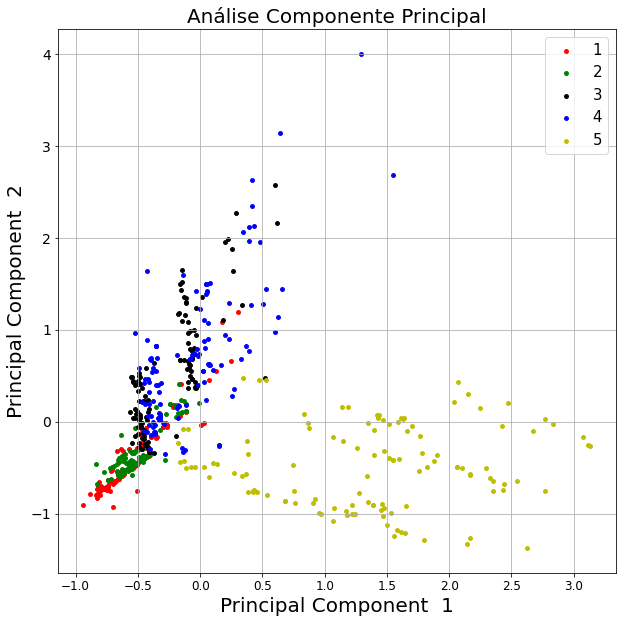

In [371]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component  1',fontsize=20)
plt.ylabel('Principal Component  2',fontsize=20)
plt.title("Análise Componente Principal",fontsize=20)
plt.grid()
targets = cnaeClass['class']
colors = ['r', 'g', 'k', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = cnaeClass['class'] == target
    plt.scatter(-dfY.loc[indicesToKeep, 0]
               , -dfY.loc[indicesToKeep, 1], c = color, s = 15)

plt.legend(targets,prop={'size': 15})

In [ ]:
principalComponents2 = np.dot(dfCNAE,np.array(np.transpose([dfPrincipalComponents['autovetores'].iloc[0],dfPrincipalComponents['autovetores'].iloc[1]])))
principalDf = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
plt.figure(figsize=(16,10))
plt.grid()
sns.scatterplot(
    x=Y[:, 0], y=Y[:, 1],
    hue=cnaeClass['class'],
    palette=['r', 'g', 'k', 'b','y'],
    data=principalDf,
    legend="full",
    alpha=0.7,
)

In [ ]:
plt.plot(Y[0])
plt.plot(Y[1])

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09425079 0.07308003]


# EX2.b - TSNE

Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 600...
Computing P-values for point 500 of 600...
Mean value of sigma: 0.837328
Iteration 10: error is 16.223539
Iteration 20: error is 14.724492
Iteration 30: error is 14.197306
Iteration 40: error is 14.085074
Iteration 50: error is 14.131097
Iteration 60: error is 14.102666
Iteration 70: error is 14.125667
Iteration 80: error is 14.107058
Iteration 90: error is 14.109262
Iteration 100: error is 14.092795
Iteration 110: error is 1.566644
Iteration 120: error is 1.082960
Iteration 130: error is 0.915774
Iteration 140: error is 0.839361
Iteration 150: error is 0.793696
Iteration 160: error is 0.764981
Iteration 170: error is 0.745636
Iteration 180: error is 0.731584
Iteration 190: error is 0.721206
Iteration 200: error is 0.712481
Iteration 210: error is 0.705677
Iteration 220: error is 0.700873
Iteration 230: 

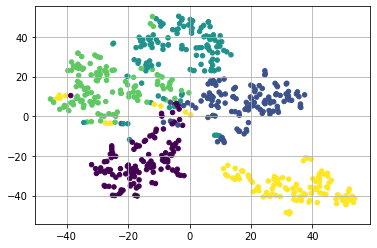

In [373]:
#
#  tsne.py
#
# Implementation of t-SNE in Python. The implementation was tested on Python
# 2.7.10, and it requires a working installation of NumPy. The implementation
# comes with an example on the MNIST dataset. In order to plot the
# results of this example, a working installation of matplotlib is required.
#
# The example can be run by executing: `ipython tsne.py`
#
#
#  Created by Laurens van der Maaten on 20-12-08.
#  Copyright (c) 2008 Tilburg University. All rights reserved.

import numpy as np
import pylab


def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P


def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P


def PCA(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y


def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = PCA(X, initial_dims).real
    (n, d) = X.shape
    max_iter = 1000
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution
    return Y


if __name__ == "__main__":
    print("Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.")
    # X = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/tsne_python/mnist2500_X.txt")
    X = dfCNAE
    # labels = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/tsne_python/mnist2500_labels.txt")
    labels = cnaeClass['class']
    Y = tsne(X, 2, 50, 20.0)
    pylab.scatter(Y[:, 0], Y[:, 1], 20, labels)
    plt.grid()
    pylab.show()

    # Yp = PCA(X, 2)
    # pylab.scatter(Yp[:, 0], Yp[:, 1], 20, labels)
    # plt.grid()
    # pylab.show()

<Figure size 432x288 with 0 Axes>

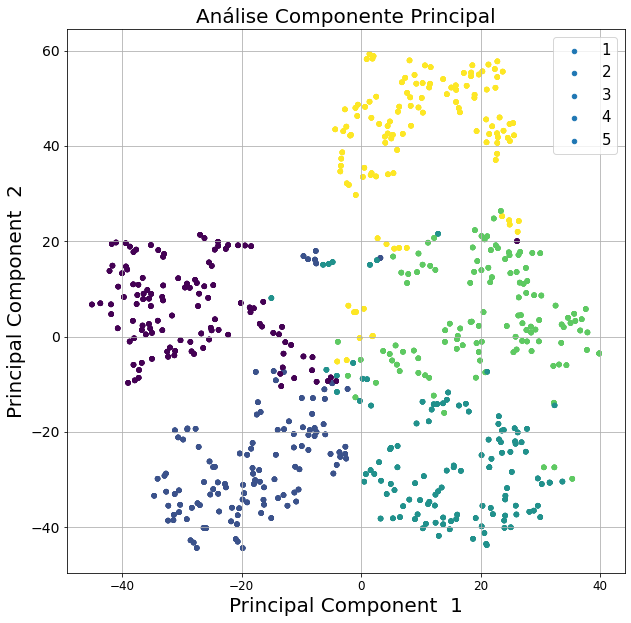

In [361]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component  1',fontsize=20)
plt.ylabel('Principal Component  2',fontsize=20)
plt.title("Análise Componente Principal",fontsize=20)
plt.grid()
targets = cnaeClass['class']
colors = ['r', 'g', 'k', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = cnaeClass['class'] == target
    plt.scatter(-Y[:, 0], -Y[:, 1], 20, labels)

plt.legend(labels,prop={'size': 15})

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component  1',fontsize=20)
plt.ylabel('Principal Component  2',fontsize=20)
plt.title("Análise Componente Principal",fontsize=20)
plt.grid()
g=sns.scatterplot(Y[:, 0], Y[:, 1], hue=cnaeClass['class'].values)
plt.legend(prop={'size': 12})

# Ex2.c - Classificador NN

In [254]:
trainX = dfCNAE[0:479]
trainY = cnaeClass[0:479]
testX = dfCNAE[480:]
testY = cnaeClass[480:]


In [149]:
simulado = predictNN(testX, trainX, trainY)

In [151]:
#  Acuracia
print('-----------------')
print('Acuracia NN: ', getAcuracia(testY, simulado))

-----------------
Acuracia NN:  0.9583333333333334


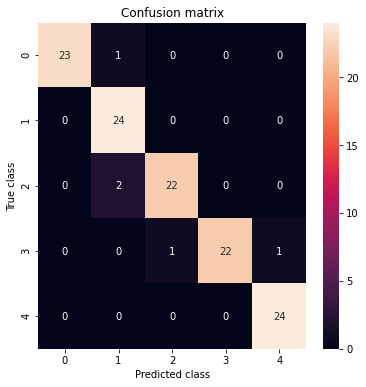

In [ ]:
# Confusion Matrix
getConfusionMatrix(testY, simulado)

In [255]:
dfY, dfPrincipalComponents, y, k =pca(trainX,2)

In [256]:
mean_vec = np.mean(trainX, axis=0)
testXM = testX - mean_vec


In [282]:
dfYTest = np.dot(testXM,np.array(np.transpose([dfPrincipalComponents['autovetores'].iloc[0],dfPrincipalComponents['autovetores'].iloc[1]])))
dfYTest = pd.DataFrame(data=dfYTest)

In [258]:
simuladoPca = predictNN(dfYTest, dfY, trainY)

In [259]:
#  Acuracia PCA
print('-----------------')
print('Acuracia NN: ', accuracy_score(testY, simuladoPca))

-----------------
Acuracia NN:  0.8166666666666667


In [ ]:
if __name__ == "__main__":
    print("Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.")
    print("Running example on 2,500 MNIST digits...")
    labels = cnaeClass['class']
    Y = tsne(X, 2, 50, 20.0)

In [319]:
trainXTSNE = Y[0:479]
trainY = cnaeClass[0:479]
testXTSNE = Y[480:]
testY = cnaeClass[480:]

In [321]:
trainXTSNE = pd.DataFrame(trainXTSNE)
testXTSNE = pd.DataFrame(testXTSNE)

In [322]:
simuladoTSNE = predictNN(testXTSNE, trainXTSNE, trainY)

In [323]:
#  Acuracia TSNE
print('-----------------')
print('Acuracia NN: ', accuracy_score(testY, simuladoTSNE))

-----------------
Acuracia NN:  0.925


# Ex3.a Breast Cancer Wiscosin (Diagnostic)

In [ ]:
rawDataWd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/wdbc.data', sep=',', header=None)

In [ ]:
#  Remove categorical columns
# Train and Test Data
trainY = rawDataWd[1].iloc[0:300]
testY = rawDataWd[1].iloc[300:570]
rawDataWd = rawDataWd.drop([0, 1],axis=1)
trainX = rawDataWd.iloc[0:300]
testX = rawDataWd.iloc[300:570]

In [ ]:
# Normaliza os dados treinamento
trainXScaled=(trainX-trainX.min())/(trainX.max()-trainX.min())
# Normaliza os dados teste
testXScaled=(testX-trainX.min())/(trainX.max()-trainX.min())

In [ ]:
simulado = predictNN(testXScaled, trainXScaled, trainY)

In [ ]:
#  Acuracia
print('-----------------')
print('Acuracia: ', getAcuracia(testY, simulado))

-----------------
Acuracia:  0.9553903345724907


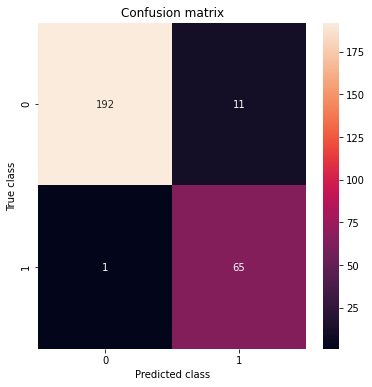

In [ ]:
# Confusion Matrix
getConfusionMatrix(testY, simulado)

# Ex3.b

### PCA

In [324]:
rawDataWd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/wdbc.data', sep=',', header=None)

In [325]:
rawDataY = (rawDataWd[1])
rawDataWd = rawDataWd.drop([0, 1],axis=1)
rawDataY.columns=['Classe']

In [326]:
# Normaliza os dados
rawDataWdScaled=(rawDataWd-rawDataWd.min())/(rawDataWd.max()-rawDataWd.min())

In [327]:
dfY, dfPrincipalComponents, Y, k = pca(rawDataWdScaled, 2)

<Figure size 432x288 with 0 Axes>

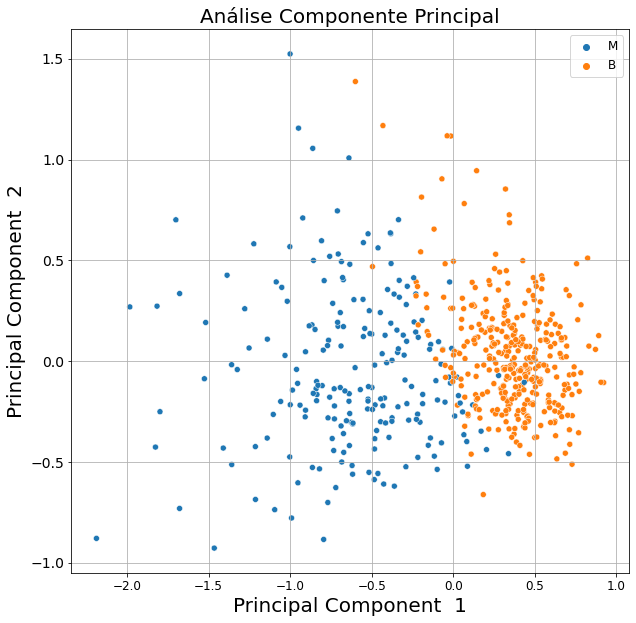

In [328]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component  1',fontsize=20)
plt.ylabel('Principal Component  2',fontsize=20)
plt.title("Análise Componente Principal",fontsize=20)
plt.grid()
g=sns.scatterplot(x=dfY[0], y=dfY[1], hue=rawDataY.values)
plt.legend(prop={'size': 12})

### Branqueamento

In [329]:
def center(X):
    X = np.array(X)
    
    mean = X.mean(axis=0)
    
    return X- mean

In [330]:
def whiten(X):
   # get the covariance matrix
   Xcov = np.dot(X.T,X)
   # eigenvalue decomposition of the covariance matrix
   d, V = np.linalg.eigh(Xcov)
   D = np.diag(1. / np.sqrt(d))
   # whitening matrix
   W = np.dot(np.dot(V, D), V.T)
   # multiply by the whitening matrix
   X_white = np.dot(X, W)

   return X_white

In [331]:
dfY, dfPrincipalComponents, Y, k = pca(rawDataWdScaled)

In [332]:
Xmean = center(dfY)

In [333]:
Xwhite = whiten(Xmean)

In [341]:
#Matriz de Covariancia = Identidate
np.dot(Xwhite.T,Xwhite)

array([[ 1.00000000e+00, -2.42861287e-17],
       [-2.42861287e-17,  1.00000000e+00]])

In [ ]:
dfY = pd.DataFrame(Xwhite)

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component  1',fontsize=20)
plt.ylabel('Principal Component  2',fontsize=20)
plt.title("Análise Componente Principal",fontsize=20)
plt.grid()
g=sns.scatterplot(x=dfY[0], y=dfY[1], hue=rawDataY.values)
plt.legend(prop={'size': 12})

# Ex3.c

In [347]:
rawDataWd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/wdbc.data', sep=',', header=None)

## Seleção dos atributos - PCA

In [348]:
#  Remove categorical columns
# Train and Test Data
trainY = rawDataWd[1].iloc[0:300]
testY = rawDataWd[1].iloc[300:570]
rawDataWd = rawDataWd.drop([0, 1],axis=1)
trainX = rawDataWd.iloc[0:300]
testX = rawDataWd.iloc[300:570]

In [349]:
# Normaliza os dados treinamento
trainXScaled=(trainX-trainX.min())/(trainX.max()-trainX.min())
# Normaliza os dados teste
testXScaled=(testX-trainX.min())/(trainX.max()-trainX.min())

In [353]:
dfY, dfPrincipalComponents, Y, k = pca(trainXScaled,2)

In [351]:
dfYTest, dfPrincipalComponents, Y, k = pca(testXScaled,6)

<Figure size 432x288 with 0 Axes>

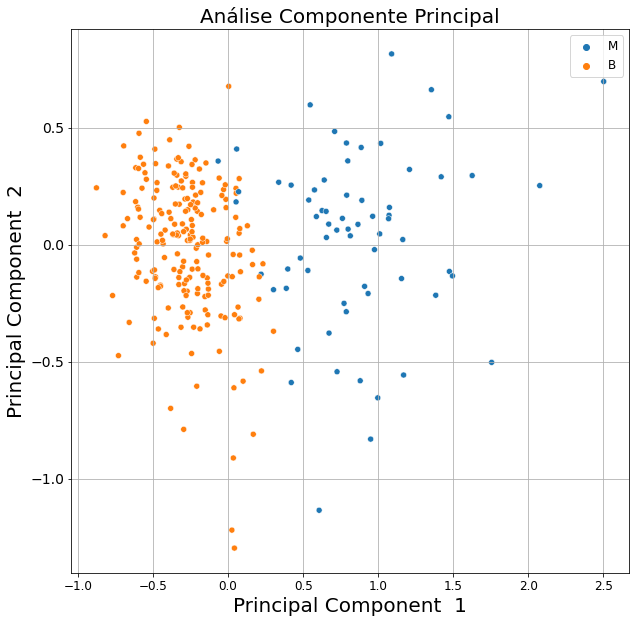

In [352]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component  1',fontsize=20)
plt.ylabel('Principal Component  2',fontsize=20)
plt.title("Análise Componente Principal",fontsize=20)
plt.grid()
g=sns.scatterplot(x=dfYTest[0], y=dfYTest[1], hue=testY.values)
plt.legend(prop={'size': 12})

In [354]:
total = np.sum(dfPrincipalComponents['autovalores'])
dfPrincipalComponents['autovalores'] = (dfPrincipalComponents['autovalores'])/total

In [355]:
dfPrincipalComponents['autovalores'].iloc[0:6].sum()

0.9071982872890803

In [356]:
mean_vec = np.mean(trainX, axis=0)
testXM = testX - mean_vec

In [357]:
dfYTest = np.dot(testXM,np.array(np.transpose([dfPrincipalComponents['autovetores'].iloc[0],dfPrincipalComponents['autovetores'].iloc[1]])))
dfYTest = pd.DataFrame(data=dfYTest)

In [360]:
simulado = predictNN(dfYTest, dfY, trainY)

In [361]:
#  Acuracia
print('-----------------')
print('Acuracia: ', accuracy_score(testY, simulado))

-----------------
Acuracia:  0.9553903345724907


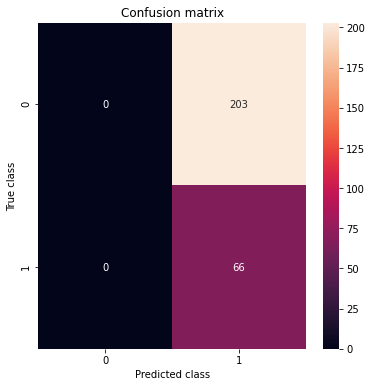

array([[  0, 203],
       [  0,  66]])

In [ ]:
# Confusion Matrix
getConfusionMatrix(testY, simulado)

## Seleção dos Atributos por correlação

In [432]:
rawDataWd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/wdbc.data', sep=',', header=None)

In [363]:
result = pd.DataFrame()
result['diagnosis'] = rawDataWd.iloc[:,1]

In [364]:
rawDataWd = rawDataWd.drop([0, 1],axis=1)

In [365]:
corr = rawDataWd.corr()

In [366]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = rawDataWd.columns[columns]
rawDataWdSelect = rawDataWd[selected_columns]
print(rawDataWdSelect.shape)
print(selected_columns)

(569, 20)
Int64Index([2, 3, 6, 7, 8, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 26, 27, 28,
            30, 31],
           dtype='int64')


In [ ]:
columns

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

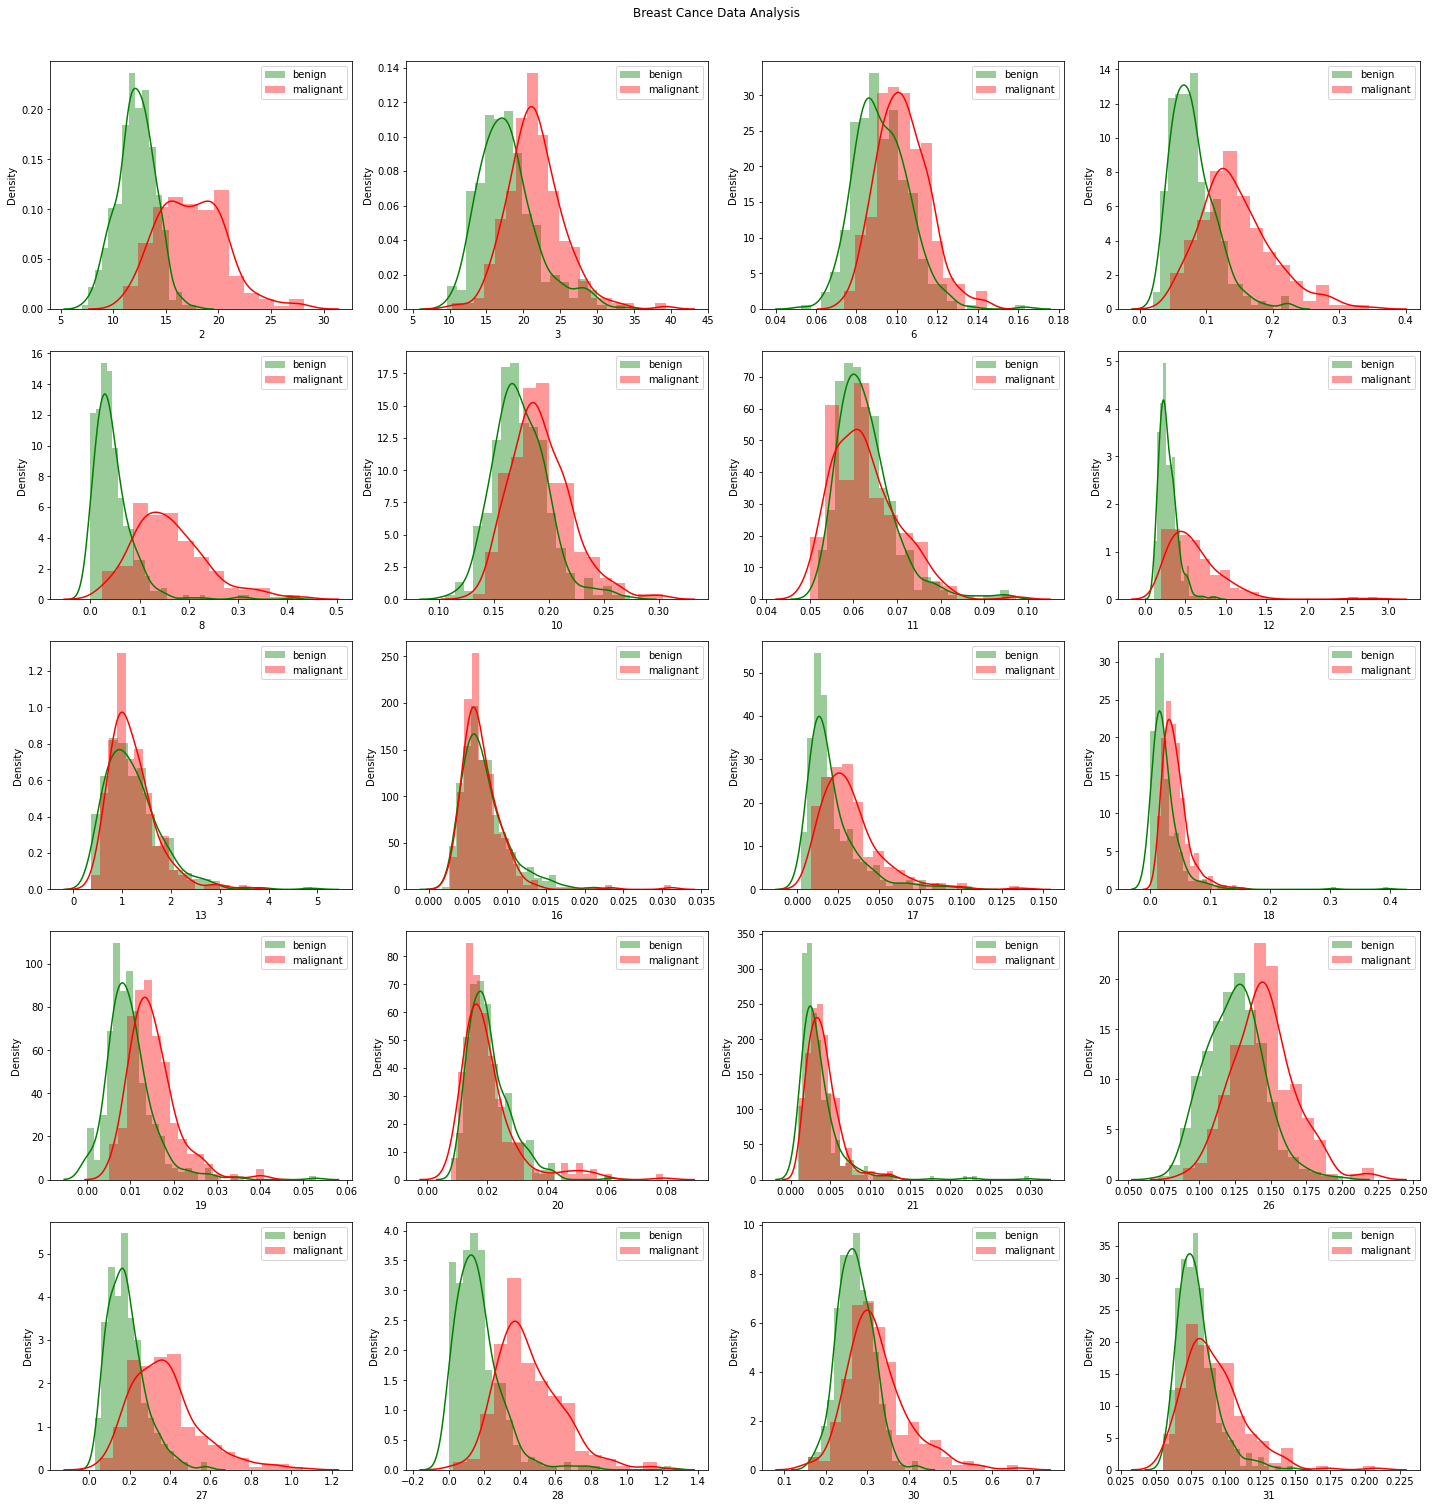

In [367]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in rawDataWdSelect.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(rawDataWdSelect[i][result['diagnosis']=='B'], color='g', label = 'benign')
    sns.distplot(rawDataWdSelect[i][result['diagnosis']=='M'], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Split Dataset train and test

In [370]:
trainY = result.iloc[0:300]
testY = result.iloc[300:570]

trainX = rawDataWdSelect.iloc[0:300]
testX = rawDataWdSelect.iloc[300:570]

In [371]:
# Normaliza os dados treinamento
trainXScaled=(trainX-trainX.min())/(trainX.max()-trainX.min())
# Normaliza os dados teste
testXScaled=(testX-trainX.min())/(trainX.max()-trainX.min())

In [372]:
simulado = predictNN(testXScaled, trainXScaled, trainY)

In [373]:
#  Acuracia
cm = confusion_matrix(testY, simulado)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
accuracy = sum/testY.shape[0]
print('-----------------')
print('Acuracia: ', accuracy)

-----------------
Acuracia:  0.9405204460966543


In [374]:
#  Acuracia
print('-----------------')
print('Acuracia: ', accuracy_score(testY, simulado))

-----------------
Acuracia:  0.9405204460966543


### Modelo sem pré processamento

In [ ]:
trainY = result.iloc[0:300]
testY = result.iloc[300:570]
rawDataWd = rawDataWd.drop([0, 1],axis=1)
trainX = rawDataWd.iloc[0:300]
testX = rawDataWd.iloc[300:570]

In [387]:
# Normaliza os dados treinamento
trainXScaled=(trainX-trainX.min())/(trainX.max()-trainX.min())
# Normaliza os dados teste
testXScaled=(testX-trainX.min())/(trainX.max()-trainX.min())

In [ ]:
simuladoRaw = predictNN(testXScaled, trainXScaled, trainY)

In [ ]:
#  Acuracia
cm = confusion_matrix(testY, simulado)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
accuracy = sum/testY.shape[0]
print('-----------------')
print('Acuracia: ', accuracy)

-----------------
Acuracia:  0.895910780669145


## Discriminante Linear de Fisher

In [475]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(trainXScaled, trainY)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [478]:
lda.explained_variance_ratio_

array([1.])

In [479]:
yPredict = predictNN(testXScaled, X_lda, trainY)

In [480]:
getAcuracia(testY, yPredict)

0.4200743494423792

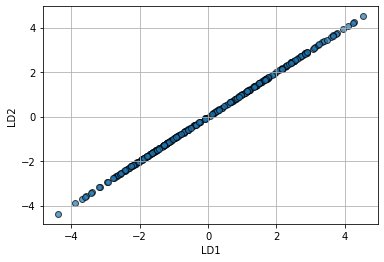

In [449]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,:],
    X_lda[:,:],
    cmap='rainbow',
    alpha=0.7,
    edgecolors='k'
)
plt.grid()

# Ex4.a - Regressão Linear

In [22]:
rawDataAir = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/AirQualityUCI/AirQualityUCI.csv', sep=';', header=0, na_filter=True,na_values=-200)

In [23]:
rawDataAir = rawDataAir.drop(['Unnamed: 15', 'Unnamed: 16'],axis=1)
rawDataAir.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
rawDataAir.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [24]:
#drop end rows with NaN values
rawDataAir.dropna(how='all',inplace=True)
#drop RH NAN rows
rawDataAir.dropna(thresh=10,axis=0,inplace=True)

In [25]:
rawDataAir.shape

(8991, 15)

In [26]:
#Split hour from time into new column
rawDataAir['Hour']=rawDataAir['Time'].apply(lambda x: int(x.split('.')[0]))
rawDataAir.Hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Hour, dtype: int64

In [27]:
print('Count of missing values:\n',rawDataAir.shape[0]-rawDataAir.count())

Count of missing values:
 Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Hour                0
dtype: int64


Fill missing value strategy
-CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour

-NMHC_GT will be dropped as it has 90% missing data

In [28]:
rawDataAir['Date']=pd.to_datetime(rawDataAir.Date)   #Format date column

In [29]:
# set the index as date
rawDataAir.set_index('Date',inplace=True)

In [30]:
rawDataAir['Month']=rawDataAir.index.month     #Create month column (Run once)
rawDataAir.reset_index(inplace=True)

In [31]:
rawDataAir.drop('NMHC(GT)',axis=1,inplace=True)    #drop col

In [32]:
rawDataAir['CO(GT)']=rawDataAir['CO(GT)'].fillna(rawDataAir.groupby(['Month','Hour'])['CO(GT)'].transform('mean'))
rawDataAir['NOx(GT)']=rawDataAir['NOx(GT)'].fillna(rawDataAir.groupby(['Month','Hour'])['NOx(GT)'].transform('mean'))
rawDataAir['NO2(GT)']=rawDataAir['NO2(GT)'].fillna(rawDataAir.groupby(['Month','Hour'])['NO2(GT)'].transform('mean'))

In [ ]:
print('Left out missing value:',rawDataAir.shape[0]-rawDataAir.count() )

Left out missing value: Date               0
Time               0
CO(GT)             0
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)          176
PT08.S3(NOx)       0
NO2(GT)          176
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
Hour               0
Month              0
dtype: int64


In [33]:
rawDataAir['CO(GT)']=rawDataAir['CO(GT)'].fillna(rawDataAir.groupby(['Hour'])['CO(GT)'].transform('mean'))
rawDataAir['NOx(GT)']=rawDataAir['NOx(GT)'].fillna(rawDataAir.groupby(['Hour'])['NOx(GT)'].transform('mean'))
rawDataAir['NO2(GT)']=rawDataAir['NO2(GT)'].fillna(rawDataAir.groupby(['Hour'])['NO2(GT)'].transform('mean'))

In [ ]:
#Use heatmap to see corelation between variables
rcParams['figure.figsize']=14,9
sns.heatmap(rawDataAir.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [ ]:
#plot all X-features against output variable AH
sns.pairplot(rawDataAir[2:])
col_=rawDataAir.columns.tolist()[2:]
for i in rawDataAir.columns.tolist()[2:]:
    sns.lmplot(x=i,y='AH',data=rawDataAir,markers='.')
    plt.grid()

# Ex4.b - Kendall Coeficient

In [ ]:
def CorrKendall(data):
  Lens =len(data)
  count = 0
  for i in range(Lens-1):
      for j in range(i+1,Lens):
        print(j)
        count = count + np.sign(data[i][0] - data[j][0]) * np.sign(data[i][2] - data[j][2])
      print('-----')
  kendallCorrelation = count/((Lens*(Lens-1))/2)
  return kendallCorrelation

In [ ]:
 Xtr = rawDataAir.iloc[0:8000]
 corrKendall = Xtr.corr(method='kendall')

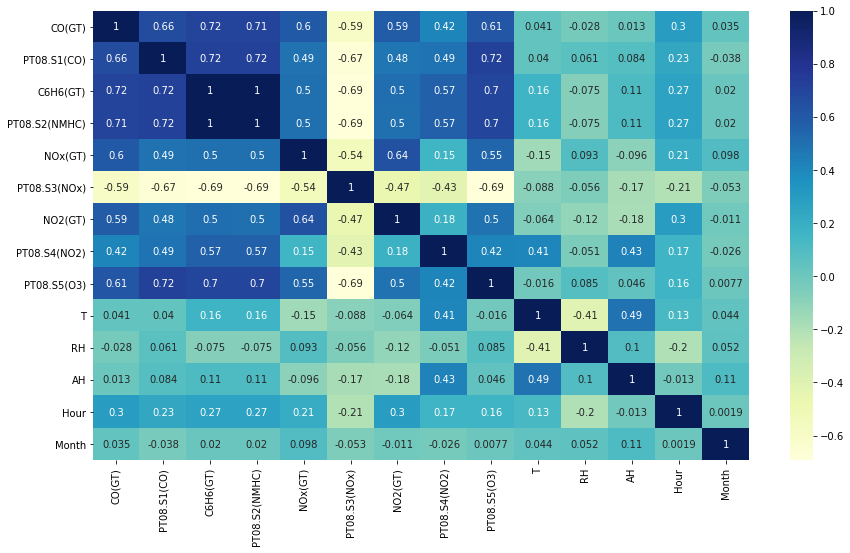

In [ ]:
rcParams['figure.figsize'] = 14.7,8.27
sns.heatmap(corrKendall, 
           xticklabels=corrKendall.columns.values, 
           yticklabels=corrKendall.columns.values, 
           cmap="YlGnBu",
          annot=True)

In [ ]:
# corrKendall2 = CorrKendall(Xtr[:2])
Xtr.iloc[0:2]

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
0,2004-10-03,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,10
1,2004-10-03,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,10


# Ex4.c - Linear Regression

## Modelo de grau 1

In [34]:
#Define Feature (X) and Target (y)
col_=rawDataAir.columns.tolist()[2:]
X=rawDataAir[col_].drop('AH',1)     #X-input features
y=rawDataAir['AH']                    #y-input features

In [ ]:
# ss=StandardScaler()     #initiatilise

In [ ]:
# X_std=ss.fit_transform(X)     #apply stardardisation

In [ ]:
# split the data into train and test with test size and 30% and train size as 70%
# X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.1102, random_state=42)

In [35]:
# Train and Test Data
y_train = y.iloc[0:8000]
y_test = y.iloc[8000:]
X_train = X.iloc[0:8000]
X_test = X.iloc[8000:]

contrucao da funcao - Modelo de grau 1

In [ ]:
X_train.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
Hour               int64
Month              int64
dtype: object

In [36]:
# multivariate linear regression
def estimateMultiLinearRegressionFit(x,t):
  # x['horsepower'] = pd.to_numeric(x['horsepower'])
  x1 = np.ones(x.shape[0])
  x.insert(0,"1",x1,True)
  x = np.array(x)
  t = np.array(t)
  w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(t)
  print('---------------------')
  print('Estimation Param: ', w)
  print('---------------------')
  return w

In [37]:
w = estimateMultiLinearRegressionFit(X_train, y_train)

---------------------
Estimation Param:  [ 3.77495080e-01 -1.64036048e-02 -1.63799076e-04  1.95521265e-02
 -1.31842230e-03  2.29903372e-04 -4.50033818e-04 -7.08090470e-04
  4.71677716e-04  9.62752507e-05  4.14228328e-02  1.47574968e-02
  2.33772227e-03  1.67160159e-03]
---------------------


In [ ]:
indice = np.arange(0,len(w),1)
indiceEx = np.delete(indice,[-1],axis=0)
w[indiceEx]

array([ 3.77495080e-01, -1.64036048e-02, -1.63799076e-04,  1.95521265e-02,
       -1.31842230e-03,  2.29903372e-04, -4.50033818e-04, -7.08090470e-04,
        4.71677716e-04,  9.62752507e-05,  4.14228328e-02,  1.47574968e-02,
        2.33772227e-03])

In [ ]:
x1 = np.ones(X_test.shape[0])
X_test.insert(0,"1",x1,True)

In [ ]:
yPredict = X_test.dot(w)
yPredictTrain = X_train.dot(w)

In [ ]:
#calculate rmse
rmse = RMSE(y_train, yPredictTrain)
print('------------')
print('RMSE do modelo - dados de treinamento:',rmse)
rmse = RMSE(y_test, yPredict)
print('------------')
print('RMSE do modelo - dados de teste:',rmse)

------------
RMSE do modelo - dados de treinamento: 0.06972598261807973
------------
RMSE do modelo - dados de teste: 0.10330065801406334


In [ ]:
#MAPE
mape = MAPE(y_train, yPredictTrain)
print('------------')
print('MAPE do modelo - dados de treinamento:%',mape)
mape = MAPE(y_test, yPredict)
print('------------')
print('MAPE do modelo - Dados de teste:%',mape)

------------
MAPE do modelo - dados de treinamento:% 27.388846406051265
------------
MAPE do modelo - Dados de teste:% 62.394834442095274


In [ ]:
#QME
qme = QME(y_test, yPredict, np.size(w))
print('------------')
print('QME of model:',qme)

------------
QME of model:% 0.018761168991541587


In [ ]:
#R2
r2 = R2(y_test, yPredict)
print('------------')
print('R2 of model:',r2)

------------
R2 of model: 0.8602444890429223


Text(0.5, 1.0, 'Multivariate linear Regression - AH')

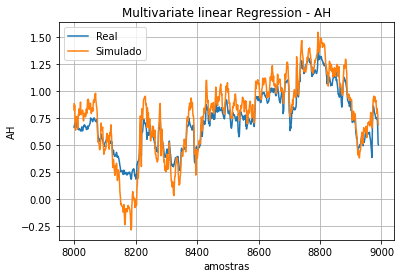

In [ ]:
plt.plot(y_test, label='Real')
plt.plot(yPredict, label='Simulado')
plt.xlabel('amostras')
plt.ylabel('AH')
plt.grid()
plt.legend()
plt.title('Multivariate linear Regression - AH')

## Modelo de grau 2

------------

4c - Modelo de grau 2

In [ ]:
#Define Feature (X) and Target (y)
col_=rawDataAir.columns.tolist()[2:]
X=rawDataAir[col_].drop('AH',1)     #X-input features
y=rawDataAir['AH']  

In [ ]:
col_=X.columns.tolist()[2:]
X1 = X
X2 = X.pow(2,axis=1)
for i in range(len(col_)):
  X1.insert(i,str(i),X2[col_[i]], True)

In [ ]:
X1

In [ ]:
# Train and Test Data
y_train = y.iloc[0:8000]
y_test = y.iloc[8000:]
X_train = X1.iloc[0:8000]
X_test = X1.iloc[8000:]

In [ ]:
w = estimateMultiLinearRegressionFit(X_train, y_train)

---------------------
Estimation Param:  [-4.25611372e-01  1.72129907e-04 -1.40258176e-06  1.99640983e-08
  1.53877289e-07  7.89821715e-06  4.05125697e-07 -2.67584023e-08
 -2.58540777e-04 -2.68118397e-04  1.46453201e-04  1.41411259e-03
 -9.28320991e-03 -5.72706849e-05  5.56044262e-02  9.80440715e-04
  1.42967405e-04 -5.45099149e-04 -2.19947993e-03 -1.21420470e-03
  9.86927329e-06  6.94622336e-02  4.68403685e-02 -2.63782421e-03
 -2.02829713e-02]
---------------------


In [ ]:
xones = np.ones(X_test.shape[0])
X_test.insert(0,"1",xones,True)

In [ ]:
yPredict = X_test.dot(w)
yPredictTrain = X_train.dot(w)

In [ ]:
#calculate rmse
rmse = RMSE(y_train, yPredictTrain)
print('------------')
print('RMSE do modelo - dados de treinamento:',rmse)
rmse = RMSE(y_test, yPredict)
print('------------')
print('RMSE do modelo - dados de teste:',rmse)

In [ ]:
#MAPE
mape = MAPE(y_train, yPredictTrain)
print('------------')
print('MAPE do modelo - dados de treinamento:%',mape)
mape = MAPE(y_test, yPredict)
print('------------')
print('MAPE do modelo - Dados de teste:%',mape)

------------
MAPE of model:% 73.5667413851533


In [ ]:
#QME
qme = QME(y_test, yPredict, np.size(w))
print('------------')
print('QME of model:',qme)

------------
QME of model: 0.018747663143592976


In [ ]:
#R2
r2 = R2(y_test, yPredict)
print('------------')
print('R2 of model:',r2)

------------
R2 of model: 0.8641312184807244


Text(0.5, 1.0, 'Multivariate linear Regression Grau 2 - AH')

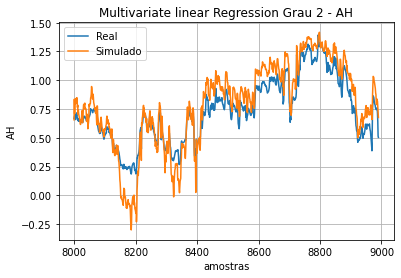

In [ ]:
plt.plot(y_test, label='Real')
plt.plot(yPredict, label='Simulado')
plt.xlabel('amostras')
plt.ylabel('AH')
plt.grid()
plt.legend()
plt.title('Multivariate linear Regression Grau 2 - AH')

## Modelo de grau 3

------------

4c - Modelo de grau 3

In [ ]:
#Define Feature (X) and Target (y)
col_=rawDataAir.columns.tolist()[2:]
X=rawDataAir[col_].drop('AH',1)     #X-input features
y=rawDataAir['AH']  

In [ ]:
col_=X.columns.tolist()[2:]
X1 = X
X2 = X.pow(2,axis=1)
X3 = X.pow(3,axis=1)
for i in range(len(col_)):
  X1.insert(i,str(i),X2[col_[i]], True)
  X1.insert(i,str(i),X3[col_[i]], True)


In [ ]:
X1

,0,1,2,3,4,5,6,7,8,9,10,10,9,8,7,6,5,4,3,2,1,0,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,Hour,Month
0,1685.159,1.144445e+09,4574296.0,1.177584e+09,1442897.0,4.843966e+09,2.038721e+09,2515.456,116930.169,5832,1000,100,324,2391.21,184.96,1607824.0,2862864.0,12769.0,1115136.0,27556.0,1094116.0,141.61,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,18,10
1,830.584,8.709839e+08,1092727.0,1.618096e+09,778688.0,3.789120e+09,9.183300e+08,2352.637,108531.333,6859,1000,100,361,2275.29,176.89,944784.0,2430481.0,8464.0,1378276.0,10609.0,912025.0,88.36,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,19,10
2,729.000,8.279360e+08,2248091.0,1.481544e+09,1481544.0,3.760029e+09,1.238833e+09,1685.159,157464.000,8000,1000,100,400,2916.00,141.61,1153476.0,2418025.0,12996.0,1299600.0,17161.0,881721.0,81.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,20,10
3,778.688,8.519714e+08,5088448.0,1.302171e+09,1815848.0,3.974345e+09,1.740992e+09,1331.000,216000.000,9261,1000,100,441,3600.00,121.00,1447209.0,2509056.0,14884.0,1192464.0,29584.0,898704.0,84.64,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,21,10
4,274.625,5.842771e+08,2248091.0,1.749690e+09,1560896.0,3.307949e+09,1.367631e+09,1404.928,211708.736,10648,1000,100,484,3552.16,125.44,1232100.0,2220100.0,13456.0,1452025.0,17161.0,698896.0,42.25,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,22,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,2460.375,1.334633e+09,105154048.0,1.565908e+08,6859000.0,2.593942e+09,5.168743e+09,10503.459,25153.757,1000,64,16,100,858.49,479.61,2989441.0,1887876.0,36100.0,290521.0,222784.0,1212201.0,182.25,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,10,4
8987,1481.544,1.083207e+09,43986977.0,2.203489e+08,5735339.0,2.019488e+09,2.043548e+09,14348.907,13312.053,1331,64,16,121,561.69,590.49,1610361.0,1597696.0,32041.0,364816.0,124609.0,1054729.0,129.96,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,11,4
8988,1906.624,1.201157e+09,25153757.0,2.192562e+08,5359375.0,1.911241e+09,1.302171e+09,19465.109,6128.487,1728,64,16,144,334.89,723.61,1192464.0,1540081.0,30625.0,363609.0,85849.0,1129969.0,153.76,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,12,4
8989,857.375,8.875037e+08,12977875.0,3.459484e+08,3796416.0,1.128112e+09,4.565330e+08,22665.187,2460.375,2197,64,16,169,182.25,800.89,592900.0,1083681.0,24336.0,492804.0,55225.0,923521.0,90.25,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,13,4


In [ ]:
# Train and Test Data
y_train = y.iloc[0:8000]
y_test = y.iloc[8000:]
X_train = X1.iloc[0:8000]
X_test = X1.iloc[8000:]

In [ ]:
w = estimateMultiLinearRegressionFit(X_train, y_train)

---------------------
Estimation Param:  [ 4.85832594e-02  8.89708003e-07  2.08917827e-09 -4.04366873e-10
 -1.22457394e-10 -1.79161212e-08 -4.79338567e-10  3.17210866e-11
 -1.61797135e-05  3.08172199e-06 -1.19735346e-05 -1.33545111e-04
  3.66991157e-03  4.90354412e-04 -6.99683932e-04  7.39258266e-04
 -1.42857657e-07  2.66135130e-06  1.65671172e-05  5.98983739e-07
  4.82930545e-07 -5.77860680e-06 -1.60641007e-03 -8.70636203e-03
 -2.65264044e-05  4.95274956e-02  4.47697940e-03  3.25206136e-05
 -9.51853347e-04 -3.29083781e-03 -4.57231237e-03  1.71447874e-04
  5.25169138e-02  6.53696886e-02 -4.90669869e-03 -2.81983383e-02]
---------------------


In [ ]:
xones = np.ones(X_test.shape[0])
X_test.insert(0,"1",xones,True)

In [ ]:
yPredict = X_test.dot(w)
yPredictTrain = X_train.dot(w)

In [ ]:
#calculate rmse
rmse = RMSE(y_train, yPredictTrain)
print('------------')
print('RMSE do modelo - dados de treinamento:',rmse)
rmse = RMSE(y_test, yPredict)
print('------------')
print('RMSE do modelo - dados de teste:',rmse)

------------
RMSE do modelo - dados de treinamento: 0.06972598261807973
------------
RMSE do modelo - dados de teste: 0.10330065801406334


In [ ]:
#MAPE
mape = MAPE(y_train, yPredictTrain)
print('------------')
print('MAPE do modelo - dados de treinamento:%',mape)
mape = MAPE(y_test, yPredict)
print('------------')
print('MAPE do modelo - Dados de teste:%',mape)

------------
MAPE do modelo - dados de treinamento:% 27.388846406051265
------------
MAPE do modelo - Dados de teste:% 62.394834442095274


In [ ]:
#QME
qme = QME(y_test, yPredict, np.size(w))
print('------------')
print('QME of model:',qme)

------------
QME of model: 0.011073284515835835


In [ ]:
#R2
r2 = R2(y_test, yPredict)
print('------------')
print('R2 of model:',r2)

------------
R2 of model: 0.9006781397308861


In [ ]:
from sklearn.metrics import r2_score
r2b = r2_score(y_test, yPredict)
print('R2: ',r2b)

Text(0.5, 1.0, 'Multivariate linear Regression Grau 2 - AH')

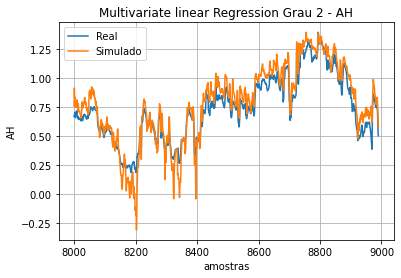

In [ ]:
plt.plot(y_test, label='Real')
plt.plot(yPredict, label='Simulado')
plt.xlabel('amostras')
plt.ylabel('AH')
plt.grid()
plt.legend()
plt.title('Multivariate linear Regression Grau 3 - AH')

------

# *Ex4.c - Função estimada usando próprio AH

Estimated coefficients:
b_0 = 1.219350405839895            
b_1 = -3.9420991583921674e-05


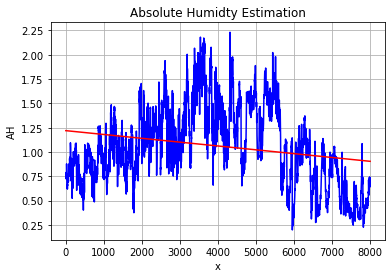

In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.plot(x, y, color = "b")
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('AH')
    plt.grid()
    plt.title("Absolute Humidty Estimation")
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(range(y_train.shape[0]))
    y = np.array(y_train)
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

# Ex5.a

In [481]:
dfAuto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/auto-mpg.csv', sep=',', header=0)

In [482]:
# Remove ('?') rows
col_=dfAuto.columns.tolist()[:]
for i in dfAuto.columns.tolist()[:]:
  dfAuto.drop(dfAuto.loc[dfAuto[i]=='?'].index, inplace=True)
dfAuto.shape

(392, 9)

In [483]:
dfAuto = dfAuto.drop(['car name'], axis=1)
dfAuto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
sns.pairplot(dfAuto)

In [484]:
#Define Feature (X) and Target (y)
col_=dfAuto.columns.tolist()[:]
X=dfAuto[col_].drop('mpg',1)     #X-input features
y=dfAuto['mpg']

In [ ]:
# ss=StandardScaler()  
# X_std=ss.fit_transform(X)     #apply stardardisation

In [ ]:
# split the data into train and test with test size and 30% and train size as 70%
# xTrainScaled, xTestScaled, yTrainScaled, yTestScaled=train_test_split(X_std,y,test_size=0.6154, random_state=42)

In [491]:
xTrain = X.iloc[0:150]
xTest = X.iloc[150:]
yTrain = y.iloc[0:150]
yTest = y.iloc[150:]

Função estimativa de parametros multivariada 

In [489]:
# multivariate linear regression
def multiLinearRegressionFit(x,t):
  # x=xTrain
  x['horsepower'] = pd.to_numeric(x['horsepower'])
  # t=yTrain
  x1 = np.ones(x.shape[0])
  x.insert(0,"1",x1,True)
  x = np.array(x)
  t = np.array(t)
  w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(t)
  print('---------------------')
  print('Estimation Param: ', w)
  print('---------------------')
  return w

In [492]:
w = multiLinearRegressionFit(xTrain, yTrain)

---------------------
Estimation Param:  [ 3.04814971e+01 -2.18759449e-01  1.20959497e-03 -2.02132000e-02
 -3.89301557e-03 -2.28287160e-02  4.25123779e-02  1.37375313e+00]
---------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [493]:
x1 = np.ones(xTest.shape[0])
xTest['horsepower'] = pd.to_numeric(xTest['horsepower'])
xTest.insert(0,"1",x1,True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [494]:
yPredict = xTest.dot(w)

In [495]:
#calculate rmse
rmse = RMSE(yTest, yPredict)
print('------------')
print('RMSE do modelo:',rmse)

------------
RMSE of model: 6.247006759621297


In [502]:
from sklearn.metrics import r2_score
r2 = r2_score(yTest, yPredict)
print('R2: ',r2)

R2:  -14.712883086256092


In [ ]:
plt.plot(yTest, label='Real')
plt.plot(yPredict, label='Simulado')
plt.xlabel('amostras')
plt.ylabel('mpg')
plt.grid()
plt.legend()
plt.title('Multivariate linear Regression - mpg')

#Ex5.b Teste F Snedecor

In [498]:
testFRes, resultado = testF(xTest,yTest,w,150)
print(testFRes)
print(resultado)
print(w)
print(xTest.columns[resultado])


[4280.59108968  -24.5963508     5.00027793  -34.23633088  179.44192011
  -11.02419678  143.11554574  100.18045163]
[False  True False  True False  True False False]
[ 3.04814971e+01 -2.18759449e-01  1.20959497e-03 -2.02132000e-02
 -3.89301557e-03 -2.28287160e-02  4.25123779e-02  1.37375313e+00]
Index(['cylinders', 'horsepower', 'acceleration'], dtype='object')


In [499]:
xTest[xTest.columns[resultado]]

,cylinders,horsepower,acceleration
152,6,95,16.0
153,6,105,16.0
154,6,72,21.0
155,6,72,19.5
156,8,170,11.5
...,...,...,...
393,4,86,15.6
394,4,52,24.6
395,4,84,11.6
396,4,79,18.6


In [500]:
yPredict = xTest[xTest.columns[resultado]].dot(w[resultado])

In [501]:
#calculate rmse
rmse = RMSE(yTest, yPredict)
print('------------')
print('RMSE do modelo:',rmse)

------------
RMSE of model: 30.274553684299054


# Ex6 - Polinomio

# Ex6.a

In [169]:
rawData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/base/Polinomio.txt', sep=' ', header=None, names=['x','z', 'y'])

In [170]:
rawData.drop(['z'], axis=1, inplace=True)

In [171]:
rawData.head()

,x,y
0,0.008544,7.745548
1,0.047690,1.271442
2,0.068297,5.949864
3,0.141045,10.455119
4,0.177673,4.162408


In [172]:
X = rawData['x']
Y = rawData['y']

In [173]:
XScaled = (X-X.mean())/X.std()
YScaled = (Y-Y.mean())/Y.std()

In [174]:
# split the data into train and test with test size and 30% and train size as 70%
xTrain, xTest, yTrain, yTest=train_test_split(X,Y,test_size=0.3, random_state=42)

In [177]:
 def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "b")
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title("Polinomio Estimation")
    # function to show plot
    plt.show()
 


função de estimativa dos coeficientes

In [175]:
def linearRegretionEstimation(x,t):
  xm = np.mean(x)
  tm = np.mean(t)
  w1 = (np.mean(x*t)-(xm*tm))/(np.mean(x**2)-(xm**2))
  w0 = tm - w1*xm
  print(w0)
  print(w1)
  return (w0, w1)

-255.1628836020442
97.760638640714
Estimated coefficients:
b_0 = -255.1628836020442        
b_1 = 97.760638640714


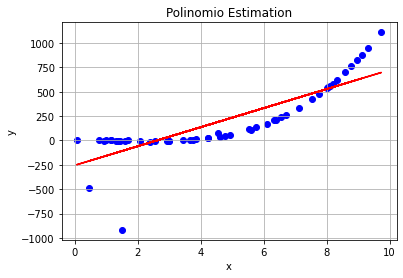

In [178]:
# observations / data
x = np.array(xTrain)
y = np.array(yTrain)

# estimating coefficients
w = linearRegretionEstimation(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(w[0], w[1]))

# plotting regression line
plot_regression_line(xTest, yTest, w)

In [211]:
# predicted response Test
y_pred = w[0] + np.dot(w[1],xTest)

In [212]:
rmseTest = RMSE(y_pred, yTest)
mapeTest = MAPE(y_pred, yTest)
print('RMSE Teste: ', rmseTest)
print('MAPE Teste: ', mapeTest)

RMSE Teste:  186.87616088562774
MAPE Teste:  4947.720030402727


In [213]:
#QME
qme = QME(yTest, y_pred, np.size(w))
print('------------')
print('QME of model:',qme)

------------
QME of model: 36348.11581377351


In [215]:
#R2
r2 = R2(yTest, y_pred)
print('------------')
print('R2 do modelo:',r2)

------------
R2 of model: 0.5530631006517133


In [209]:
# predicted response Train
y_pred = w[0] + np.dot(w[1],xTrain)

In [207]:
rmseTrain = RMSE(y_pred, yTrain)
mapeTrain = MAPE(y_pred, yTrain)
print('RMSE Train: ', rmseTrain)
print('MAPE Train: ', mapeTrain)

RMSE Train:  231.84402380021476
MAPE Train:  339551.0301919368


In [203]:
(w[1]*xTest).shape, xTest.shape

((51,), (51,))

# Ex6.b

In [260]:
X = rawData['x']
Y = rawData['y']

Para modelo de grau 2

In [217]:
# Adiciona a variavel X ao quadrado
X1 = X
X2 = X1.pow(2)
X = pd.DataFrame(X)
X.insert(0,"x2",X2, True)

Para o modelo de grau 3

In [261]:
X = pd.DataFrame(X)
col_=X.columns.tolist()
X1 = X
X2 = X.pow(2,axis=1)
X3 = X.pow(3,axis=1)
for i in range(len(col_)):
  X1.insert(i,str(i),X2[col_[i]], True)
  X1.insert(i,str(i),X3[col_[i]], True)
X = X1

Para o modelo de grau 4

In [249]:
X = pd.DataFrame(X)
col_=X.columns.tolist()
X1 = X
X2 = X.pow(2,axis=1)
X3 = X.pow(3,axis=1)
X4 = X.pow(4,axis=1)
for i in range(len(col_)):
  X1.insert(i,str(i),X2[col_[i]], True)
  X1.insert(i,str(i),X3[col_[i]], True)
  X1.insert(i,str(i),X4[col_[i]], True)
X = X1

-----

In [262]:
# split the data into train and test with test size and 30% and train size as 70%
xTrain, xTest, yTrain, yTest=train_test_split(X,Y,test_size=0.3, random_state=42)

In [263]:
w = estimateMultiLinearRegressionFit(xTrain, yTrain)

---------------------
Estimation Param:  [  6.08208947   2.8217366  -17.25339739  19.42544787]
---------------------


In [264]:
xones = np.ones(xTest.shape[0])
xTest.insert(0,"1",xones,True)

In [265]:
yPredict = xTest.dot(w)

In [277]:
#calculate rmse
rmse = RMSE(yTest, yPredict)
print('------------')
print('RMSE do modelo:',rmse)

------------
RMSE do modelo: 144.82983321167208


In [278]:
#MAPE
mape = MAPE(yTest, yPredict)
print('------------')
print('MAPE do modelo:%',mape)

------------
MAPE do modelo:% 5283.751326087205


In [279]:
#QME
qme = QME(yTest, yPredict, np.size(w))
print('------------')
print('QME do modelo:',qme)

------------
QME do modelo: 22760.844893492733


In [280]:
#R2
r2 = R2(yTest, yPredict)
print('------------')
print('R2 of model:',r2)

------------
R2 of model: 0.7727164672052769


Text(0.5, 1.0, 'Multivariate linear Regression Grau 2 ')

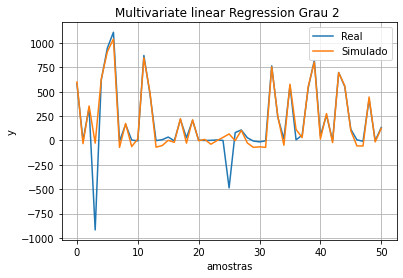

In [ ]:
plt.plot(yTest.values, label='Real')
plt.plot(yPredict.values, label='Simulado')
plt.xlabel('amostras')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.title('Multivariate linear Regression Grau 2 ')

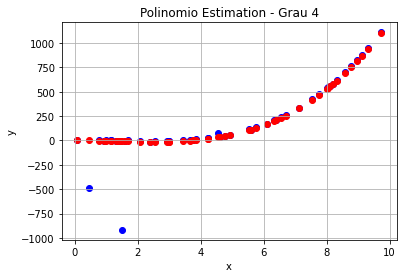

In [281]:
# plotting the actual points as scatter plot
plt.scatter(xTest['x'], yTest, color = "b")

# predicted response vector
# y_pred = b[0] + b[1]*x

# plotting the regression line
plt.scatter(xTest['x'], yPredict, color = "r")

# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title("Polinomio Estimation - Grau 4")
# function to show plot
plt.show()

# Ex6.c - Ransac

In [283]:
X = rawData['x']
Y = rawData['y']

Para o modelo de grau 3

In [284]:
X = pd.DataFrame(X)
col_=X.columns.tolist()
X1 = X
X2 = X.pow(2,axis=1)
X3 = X.pow(3,axis=1)
for i in range(len(col_)):
  X1.insert(i,str(i),X2[col_[i]], True)
  X1.insert(i,str(i),X3[col_[i]], True)
X = X1

In [275]:
ransac = linear_model.RANSACRegressor()
ransac.fit(xTrain, yTrain)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
w = ransac.estimator_.coef_
print("Estimated coefficients (true, linear regression, RANSAC):")
print(w)

Estimated coefficients (true, linear regression, RANSAC):
[ 0.          2.0157877  -8.25188285  2.82968734]


In [285]:
# split the data into train and test with test size and 30% and train size as 70%
xTrain, xTest, yTrain, yTest=train_test_split(X,Y,test_size=0.3, random_state=42)

In [287]:
xones = np.ones(xTest.shape[0])
xTest.insert(0,"1",xones,True)

In [288]:
yPredict = xTest.dot(w)

In [289]:
#calculate rmse
rmse = RMSE(yTest, yPredict)
print('------------')
print('RMSE do modelo:',rmse)

------------
RMSE do modelo: 144.82983321167208


In [291]:
#MAPE
mape = MAPE(yTest, yPredict)
print('------------')
print('MAPE do modelo:%',mape)

------------
MAPE do modelo:% 5283.751326087205


In [292]:
#QME
qme = QME(yTest, yPredict, np.size(w))
print('------------')
print('QME do modelo:',qme)

------------
QME do modelo: 22760.844893492733


In [293]:
#R2
r2 = R2(yTest, yPredict)
print('------------')
print('R2 of model:',r2)

------------
R2 of model: 0.7727164672052769


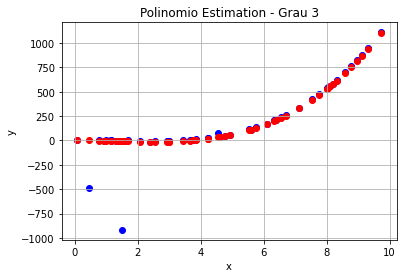

In [295]:
# plotting the actual points as scatter plot
plt.scatter(xTest['x'], yTest, color = "b")
# plotting the regression line
plt.scatter(xTest['x'], yPredict, color = "r")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title("Polinomio Estimation - Grau 3")
plt.show()

# Ex7.a

## Pre- Processamento

In [122]:
dfCarEvolution = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/car.data', sep=',', header=None)

In [34]:
dfCarEvolution.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [123]:
dfCarEvolution.rename(columns = {0:'buying',1:'maintainence',2:'doors',3:'persons',4:'lug_boot',5:'safety',6:'class'},inplace = True)

In [94]:
dfCarEvolution['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


Verificando como as categorias estão distribuídas nas colunas 

In [ ]:
for i in dfCarEvolution.columns:
    print(dfCarEvolution[i].value_counts())
    print()


A partir da saída acima, fica claro que todas as colunas, exceto 'classe', são distribuídas igualmente entre os dados.

Abaixo está o gráfico que fornece a contagem de valores por coluna.

In [ ]:
sns.countplot(dfCarEvolution['class'])


It can be seen from the graph that the result 'class' is unbalanced with larger values of 'unacc'. So, this is an unbalanced multiclass classification problem.

I've checked how the 'class' is distributed for each of the feature in our data.

In [ ]:
for i in dfCarEvolution.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(dfCarEvolution[i],hue=dfCarEvolution['class'])

Valores de string, convertidas as categorias de string em inteiros, mantendo a mesma quantidade de atributos

In [36]:
# usando as amostras sem separar as categorias de cada atributo
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in dfCarEvolution.columns:
    dfCarEvolution[i]=le.fit_transform(dfCarEvolution[i])
X=dfCarEvolution[dfCarEvolution.columns[:-1]]
y=dfCarEvolution['class']

--------

Amostras separadas por categorias de cada atributo - Desta forma aumentamos a quantidade de atributos de 6 para 21

In [124]:
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}}

In [125]:
dfCarEvolution.replace(cleanup_nums,inplace = True)

In [ ]:
dfCarEvolution.dtypes

buying          object
maintainence    object
doors           object
persons         object
lug_boot        object
safety          object
class            int64
dtype: object

In [126]:
y = dfCarEvolution['class']

In [127]:
dfCarEvolution.drop( ['class'],axis = 1,inplace = True)

In [128]:
X = pd.get_dummies(dfCarEvolution)
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maintainence_high,maintainence_low,maintainence_med,maintainence_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


-----

##KNN

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1296, 21), (1296,), (432, 21), (432,))

In [82]:
# y_predict = predictKNN(X_test, X_train, y_train, 5)

3 k-fold cross validation

hold out: 0
(922, 21)
hold out: 1
(922, 21)
hold out: 2
(922, 21)
Scores: [0.8988439306358381, 0.861271676300578, 0.8554913294797688]
Acuracia 0.87 com desvio padrão 0.02
Acuracia Média:  0.871868978805395
Macro Recall Média:  0.7258812242941501
Macro Precision Média:  0.7262829227454303


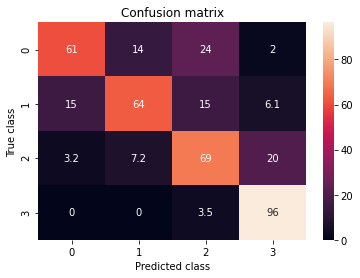

In [130]:
scores = list()
scoresRecall = list()
scoresPrecision = list()
folds = 3
cm=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

partes = int(X_train.shape[0]/folds)

for fold in range(folds):
  print('hold out:',fold)
  X_trainF = X_train.drop(range(fold*partes,(fold+1)*partes))
  y_trainF = y_train.drop(range(fold*partes,(fold+1)*partes))

  scaler = preprocessing.StandardScaler().fit(X_trainF)
  X_trainScaled = pd.DataFrame(scaler.transform(X_trainF))
  X_testScaled = pd.DataFrame(scaler.transform(X_test))
  y_predict = predictKNN(X_testScaled, X_trainScaled, y_trainF, 5)
  accuracy = getAcuracia(y_test, y_predict)
  scores.append(accuracy)
  recall = getRecall(y_test, y_predict)
  scoresRecall.append(recall)
  precision = getPrecision(y_test, y_predict)
  scoresPrecision.append(precision)
  print(X_trainF.shape)
  
print('Scores:', scores)
print("Acuracia %0.2f com desvio padrão %0.2f" % (np.mean(scores), np.std(scores)))
print('Acuracia Média: ', np.mean(scores))
print('Macro Recall Média: ', np.mean(scoresRecall))
print('Macro Precision Média: ', np.mean(scoresPrecision))

In [102]:
# Base de treinamento dividida em duas partes iguais, uma para treinar(X_train50) e a outra(X_test50) para validar e encontrar o melhor valor de k
print('KNN regression: Efeito da variação do K Neighbors \n')
for k in [1,3,5,7,9,11,13]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
    X_train50, X_test50, y_train50, y_test50 = train_test_split(X_train, y_train, test_size=0.5, random_state = 42)
    y_predict = predictKNN(X_test50, X_train50, y_train50, k)
    accuracy = getAcuracia(y_test50, y_predict)
    recall = getRecall(y_test50, y_predict)
    precision = getPrecision(y_test50, y_predict)
    r2 = R2(y_test50, y_predict)
    print('No of Neighbors = {:.1f}, \
  Acuracia: {:.2f}, Recall: {:.2f} , Precision: {:.2f}, R2: {:.2f}'
    .format(k, accuracy, recall, precision, r2))

KNN regression: Efeito da variação do K Neighbors 

No of Neighbors = 1.0,   Acuracia: 0.74, Recall: 0.63 , Precision: 0.52, R2: 0.28
No of Neighbors = 3.0,   Acuracia: 0.82, Recall: 0.64 , Precision: 0.62, R2: 0.44
No of Neighbors = 5.0,   Acuracia: 0.85, Recall: 0.69 , Precision: 0.73, R2: 0.55
No of Neighbors = 7.0,   Acuracia: 0.85, Recall: 0.62 , Precision: 0.71, R2: 0.45
No of Neighbors = 9.0,   Acuracia: 0.85, Recall: 0.61 , Precision: 0.81, R2: 0.37
No of Neighbors = 11.0,   Acuracia: 0.84, Recall: 0.54 , Precision: 0.77, R2: 0.23
No of Neighbors = 13.0,   Acuracia: 0.83, Recall: 0.53 , Precision: 0.76, R2: 0.15


-------

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.91


In [ ]:
print('KNN regression: effect of regularization parameter n_neighbors \n')
for this_n in [1, 3, 5,7,9,11,13]:
    knn = KNeighborsClassifier(n_neighbors = this_n).fit(X_train, y_train)
    r2_train = knn.score(X_train, y_train)
    r2_test = knn.score(X_test, y_test)
    print('No of Neighbors = {:.2f}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_n, r2_train, r2_test))

KNN regression: effect of regularization parameter n_neighbors 

No of Neighbors = 1.00, r-squared training: 1.00, r-squared test: 0.77

No of Neighbors = 3.00, r-squared training: 0.95, r-squared test: 0.84

No of Neighbors = 5.00, r-squared training: 0.95, r-squared test: 0.91

No of Neighbors = 7.00, r-squared training: 0.96, r-squared test: 0.92

No of Neighbors = 9.00, r-squared training: 0.97, r-squared test: 0.93

No of Neighbors = 11.00, r-squared training: 0.98, r-squared test: 0.94

No of Neighbors = 13.00, r-squared training: 0.97, r-squared test: 0.92



In [ ]:
best_knn = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(best_knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(best_knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.94


In [ ]:

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report


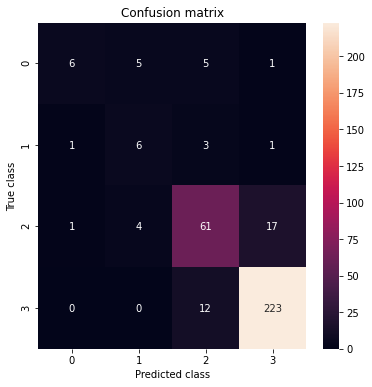

array([[  6,   5,   5,   1],
       [  1,   6,   3,   1],
       [  1,   4,  61,  17],
       [  0,   0,  12, 223]])

In [84]:
# Best KNN
getConfusionMatrix(y_test, y_predict)

In [ ]:
# print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       103
           1       1.00      0.27      0.42        15
           2       0.87      0.99      0.93       294
           3       0.93      0.65      0.76        20

    accuracy                           0.86       432
   macro avg       0.90      0.64      0.71       432
weighted avg       0.86      0.86      0.85       432



## Rocchio

In [85]:
def getCentroide(trainDataScaled, trainDataY):
  # Centroide
  centroide = []
  cont=0
  nclasses = trainDataY.value_counts()
  len(nclasses)
  for c in range(1,4):
    rowsIndexClass = trainDataScaled.index[trainDataY==c]
    trainDataScaled.loc[(rowsIndexClass)]
    medias = np.mean(trainDataScaled.loc[(rowsIndexClass)])
    centroide.append([medias])
  return centroide

In [86]:
def predictRocchio(testData, centroide):
  vetorDistancia = []
  simulado = []
  for i in range(len(testData)):
    distancia = []
    ix = 0
    for j in range(0,3):
      distancia.append(np.sqrt(((testData.iloc[[i]].values-centroide[j])**2).sum(1)))
    ix = argmin(distancia)
    simulado.append(ix+1)
  return simulado

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [87]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
# clf.fit(X_train, y_train)
# NearestCentroid()
# y_predict = clf.predict(X_test)

In [ ]:
scores = list()
scoresRecall = list()
scoresPrecision = list()
folds = 3
cm=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

partes = int(X_train.shape[0]/folds)

for fold in range(folds):
  print('hold out:',fold)
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  # for fold in range(folds):
  X_trainF = X_train.drop(range(fold*partes,(fold+1)*partes))
  y_trainF = y_train.drop(range(fold*partes,(fold+1)*partes))

  scaler = preprocessing.StandardScaler().fit(X_trainF)
  X_trainScaled = pd.DataFrame(scaler.transform(X_trainF))
  X_testScaled = pd.DataFrame(scaler.transform(X_test))
  clf.fit(X_trainScaled, y_trainF)
  NearestCentroid()
  y_predict = clf.predict(X_testScaled)
  accuracy = getAcuracia(y_test, y_predict)
  scores.append(accuracy)
  recall = getRecall(y_test, y_predict)
  scoresRecall.append(recall)
  precision = getPrecision(y_test, y_predict)
  scoresPrecision.append(precision)
  cm = cm+(confusion_matrix(y_test, y_predict, normalize='true'))
  print(X_trainF.shape)
  
print('Scores:', scores)
print("Acuracia %0.2f com desvio padrão %0.2f" % (np.mean(scores), np.std(scores)))
print('Acuracia Média: ', np.mean(scores))
print('Macro Recall Média: ', np.mean(scoresRecall))
print('Macro Precision Média: ', np.mean(scoresPrecision))

In [69]:
centroide = getCentroide(X_train, y_train)

In [70]:
# Calcular a menor distancia do ponto - NN
y_predict = predictRocchio(X_test,centroide)

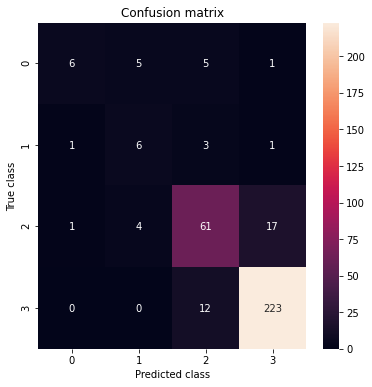

In [131]:
cmPct = np.round((getConfusionMatrix(y_test, y_predict)/len(y_predict))*100,1)

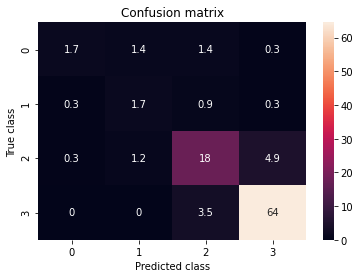

In [132]:
# Matriz de confusão em percentual
sns.heatmap(cmPct, annot=True);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.08      0.67      0.14        15
           2       0.86      0.63      0.73       294
           3       0.22      1.00      0.37        20

    accuracy                           0.50       432
   macro avg       0.29      0.57      0.31       432
weighted avg       0.60      0.50      0.52       432



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ex8.a - Cartiotocography

In [142]:
dfCartio = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/CTG.xls', sheet_name = 1, skiprows = 1)

In [36]:
dfCartio

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [143]:
dfCartio.drop(dfCartio.iloc[:, :10], inplace = True, axis = 1)
dfCartio.drop(dfCartio.iloc[:, 22:33], inplace = True, axis = 1)
dfCartio = dfCartio.drop(['Unnamed: 31', 'Unnamed: 44', 'CLASS'], axis = 1)
dfCartio = dfCartio.dropna()
dfCartio = dfCartio.drop_duplicates()

In [ ]:
dfCartio.info()

In [ ]:
dfCartio.describe()

In [144]:
X=dfCartio[dfCartio.columns[:-1]]
y=dfCartio['NSP']

In [145]:
# Split Data Train, Valid, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [146]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_trainScaled = pd.DataFrame(scaler.transform(X_train))
X_testScaled = pd.DataFrame(scaler.transform(X_test))
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
crossValidation = 2 # divide os dados de treino em duas partes

SFS

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.0s finished

[2021-04-18 19:08:12] Features: 1/6 -- score: 0.8029661016949152[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.0s finished

[2021-04-18 19:08:13] Features: 2/6 -- score: 0.8100282485875707[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.9s finished

[2021-04-18 19:08:13] Features: 3/6 -- score: 0.8545197740112995[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

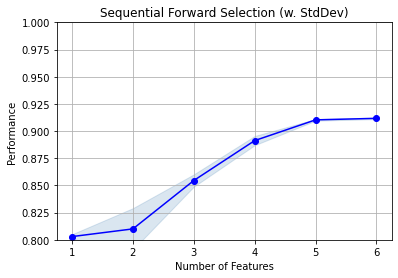

In [147]:
# Sequential Forward Selection
sfs1 = SFS(knn, 
           k_features=6, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=crossValidation)
sfs1 = sfs1.fit(X_trainScaled, y_train)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [148]:
print('Selected features:', sfs1.k_feature_idx_)
print('Selected features:', X.columns[[sfs1.k_feature_idx_]])

Selected features: (4, 5, 6, 7, 8, 9)
Selected features: Index(['DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV'], dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [149]:
# Generate the new subsets based on the selected features
# The transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = pd.DataFrame(sfs1.transform(X_trainScaled))
X_test_sfs = pd.DataFrame(sfs1.transform(X_testScaled))
# Fit the estimator using the new feature subset
# and make a prediction on the test data
y_predict = predictKNN(X_test_sfs, X_train_sfs, y_train, 1)
# Compute the accuracy of the prediction
accuracy = getAcuracia(y_test, y_predict)
print('Test set accuracy: %.2f %%' % (accuracy * 100))

Test set accuracy: 89.68 %


SBS

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.7s finished

[2021-04-18 19:08:46] Features: 20/6 -- score: 0.9032485875706215[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.5s finished

[2021-04-18 19:08:47] Features: 19/6 -- score: 0.9060734463276836[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.4s finished

[2021-04-18 19:08:49] Features: 18/6 -- score: 0.9067796610169492[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  


Sequential Backward Selection (k=6):
(6, 7, 8, 9, 12, 20)
Selected features: Index(['DP.1', 'ASTV', 'MSTV', 'ALTV', 'Min', 'Tendency'], dtype='object')
CV Score:
0.8954802259887005


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished

[2021-04-18 19:08:58] Features: 6/6 -- score: 0.8954802259887005/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


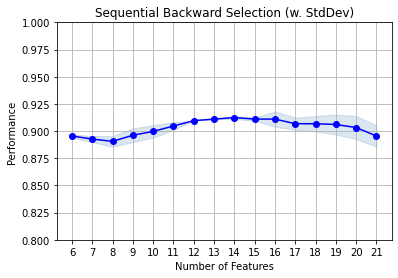

In [150]:
# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=6, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=crossValidation)
sbs = sbs.fit(X_trainScaled.values, y_train.values)

print('\nSequential Backward Selection (k=6):')
print(sbs.k_feature_idx_)
print('Selected features:', X.columns[[sbs.k_feature_idx_]])
print('CV Score:')
print(sbs.k_score_)
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [151]:
# Generate the new subsets based on the selected features
# The transform call is equivalent to
# X_train[:, sbs.k_feature_idx_]
X_train_sbs = pd.DataFrame(sbs.transform(X_trainScaled))
X_test_sbs = pd.DataFrame(sbs.transform(X_testScaled))
# Fit the estimator using the new feature subset
# and make a prediction on the test data
y_predict = predictKNN(X_test_sbs, X_train_sbs, y_train, 1)
# Compute the accuracy of the prediction
accuracy = getAcuracia(y_test, y_predict)
print('Test set accuracy: %.2f %%' % (accuracy * 100))

Test set accuracy: 90.54 %


# Ex8.b

In [152]:
# Não faz Cross validation utiliza 100% dos dados de treinamento
crossValidation = 0

SBS - No CrossValidation

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.9s finished

[2021-04-18 19:22:38] Features: 1/6 -- score: 0.8637005649717514[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished

[2021-04-18 19:22:39] Features: 2/6 -- score: 0.934322033898305[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.8s finished

[2021-04-18 19:22:40] Features: 3/6 -- score: 0.9936440677966102[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

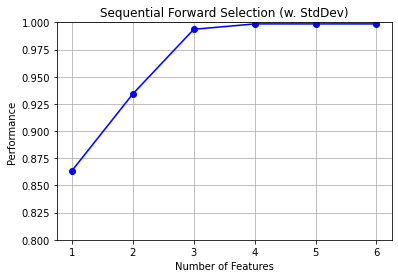

In [153]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
sfs1 = SFS(knn, 
           k_features=6, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=crossValidation)
sfs1 = sfs1.fit(X_trainScaled, y_train)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [154]:
print('Selected features:', sfs1.k_feature_idx_)
print('Selected features:', X.columns[[sfs1.k_feature_idx_]])

Selected features: (0, 1, 2, 3, 4, 9)
Selected features: Index(['LB', 'AC.1', 'FM.1', 'UC.1', 'DL.1', 'ALTV'], dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [155]:
# Generate the new subsets based on the selected features
# The transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = pd.DataFrame(sfs1.transform(X_trainScaled))
X_test_sfs = pd.DataFrame(sfs1.transform(X_testScaled))
# Fit the estimator using the new feature subset
# and make a prediction on the test data on NN classifier
y_predict = predictKNN(X_test_sfs, X_train_sfs, y_train, 1)
# Compute the accuracy of the prediction
accuracy = getAcuracia(y_test, y_predict)
print('Test set accuracy: %.2f %%' % (accuracy * 100))

Test set accuracy: 85.96 %


SBS - No CrossValidation

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.8s finished

[2021-04-18 19:22:58] Features: 20/6 -- score: 0.998587570621469[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.6s finished

[2021-04-18 19:22:59] Features: 19/6 -- score: 0.998587570621469[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.5s finished

[2021-04-18 19:23:01] Features: 18/6 -- score: 0.998587570621469[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 


Sequential Backward Selection (k=6):
(0, 1, 2, 3, 4, 8)
Selected features: Index(['LB', 'AC.1', 'FM.1', 'UC.1', 'DL.1', 'MSTV'], dtype='object')
CV Score:
0.998587570621469


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished

[2021-04-18 19:23:11] Features: 6/6 -- score: 0.998587570621469/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


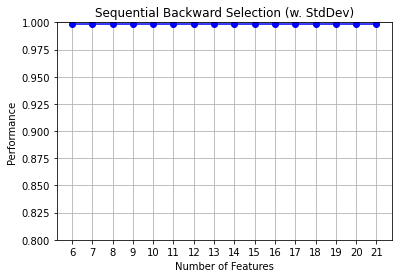

In [156]:
# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=6, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=crossValidation)
sbs = sbs.fit(X_trainScaled.values, y_train.values)

print('\nSequential Backward Selection (k=6):')
print(sbs.k_feature_idx_)
print('Selected features:', X.columns[[sbs.k_feature_idx_]])
print('CV Score:')
print(sbs.k_score_)
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [157]:
# Generate the new subsets based on the selected features
# The transform call is equivalent to
# X_train[:, sbs.k_feature_idx_]
X_train_sbs = pd.DataFrame(sbs.transform(X_trainScaled))
X_test_sbs = pd.DataFrame(sbs.transform(X_testScaled))
# Fit the estimator using the new feature subset
# and make a prediction on the test data
y_predict = predictKNN(X_test_sbs, X_train_sbs, y_train, 1)
# Compute the accuracy of the prediction
accuracy = getAcuracia(y_test, y_predict)
print('Test set accuracy: %.2f %%' % (accuracy * 100))

Test set accuracy: 88.25 %


# EX9.a - Image Segmentation

In [158]:
dfSegment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina/segment.dat', sep=' ', header=None)

In [159]:
dfSegment.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,218.0,178.0,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.77778,-25.222221,75.222220,0.318996,-2.040554,6
1,113.0,130.0,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.00000,-2.333333,2.555556,1.000000,-2.123254,3
2,202.0,41.0,9,0.000000,0.0,0.944448,0.772202,1.111112,1.025597,123.037040,111.888885,139.777790,117.444440,-33.444443,50.22222,-16.777779,139.777790,0.199347,-2.299918,2
3,32.0,173.0,9,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,39.555557,52.888890,38.333336,-12.111111,27.88889,-15.777778,52.888890,0.266914,-1.998858,6
4,61.0,197.0,9,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,44.222220,61.555557,43.000000,-16.111110,35.88889,-19.777779,61.555557,0.302925,-2.022274,6


In [160]:
dfSegment.rename(columns = {0:'centroid-col',1:'centroid-row',2:'pixel-count',3:'density-5',4:'density-2',5:'vedge-mean',6:'vegde-sd',7:'hedge-mean',8:'hedge-sd',9:'intensity-mean',10:'rawred-mean',11:'rawblue-mean',12:'rawgreen-mean',13:'exred-mean',14:'exblue-mean',15:'exgreen-mean',16:'value-mean',17:'saturatoin-mean',18:' hue-mean',19:'class'},inplace = True)

In [161]:
X=dfSegment[dfSegment.columns[:-1]]
y=dfSegment['class']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


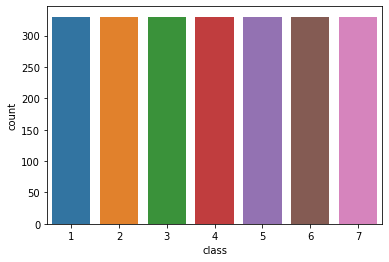

In [167]:
sns.countplot(dfSegment['class'])

In [175]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((3, 19), (1848,), (462, 19), (462,))

KNN - 5 hold out

In [162]:

scores = list()
scoresRecall = list()
scoresPrecision = list()
folds = 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

partes = int(X_train.shape[0]/folds)

for fold in range(folds):
  print('hold out:',fold)
  X_trainF = X_train.drop(range(fold*partes,(fold+1)*partes))
  y_trainF = y_train.drop(range(fold*partes,(fold+1)*partes))
  scaler = preprocessing.StandardScaler().fit(X_trainF)
  X_trainScaled = pd.DataFrame(scaler.transform(X_trainF))
  X_testScaled = pd.DataFrame(scaler.transform(X_test))
  y_predict = predictKNN(X_testScaled, X_trainScaled, y_trainF, 11)
  accuracy = getAcuracia(y_test, y_predict)
  scores.append(accuracy)
  recall = getRecall(y_test, y_predict)
  scoresRecall.append(recall)
  precision = getPrecision(y_test, y_predict)
  scoresPrecision.append(precision)
  print(X_trainF.shape)
  
print('Scores:', scores)
print("Acuracia %0.2f com desvio padrão %0.2f" % (np.mean(scores), np.std(scores)))
print('Acuracia Média: ', np.mean(scores))
print('Macro Recall Média: ', np.mean(scoresRecall))
print('Macro Precision Média: ', np.mean(scoresPrecision))


hold out: 0
(1479, 19)
hold out: 1
(1479, 19)
hold out: 2
(1479, 19)
hold out: 3
(1479, 19)
hold out: 4
(1479, 19)
Scores: [0.9134199134199135, 0.9090909090909091, 0.9112554112554112, 0.8982683982683982, 0.9112554112554112]
Acuracia 0.91 com desvio padrão 0.01
Acuracia Média:  0.9086580086580085
Macro Recall Média:  0.9172747052491281
Macro Precision Média:  0.9149759244350426


In [94]:
X_train.shape

(1848, 19)

In [165]:
# Base de treinamento dividida em duas partes iguais, uma para treinar(X_train50) e a outra(X_test50) para validar e encontrar o melhor valor de k
print('KNN regression: Efeito da variação do K Neighbors \n')
for k in [1,3,5,7,9,11,13]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
    X_train50, X_test50, y_train50, y_test50 = train_test_split(X_train, y_train, test_size=0.5, random_state = 42)
    y_predict = predictKNN(X_test50, X_train50, y_train50, k)
    accuracy = getAcuracia(y_test50, y_predict)
    recall = getRecall(y_test50, y_predict)
    precision = getPrecision(y_test50, y_predict)
    r2 = R2(y_test50, y_predict)
    print('No of Neighbors = {:.1f}, \
  Acuracia: {:.2f}, Recall: {:.2f} , Precision: {:.2f}, R2: {:.2f}'
    .format(k, accuracy, recall, precision, r2))

KNN regression: Efeito da variação do K Neighbors 



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No of Neighbors = 1.0,   Acuracia: 0.15, Recall: 0.15 , Precision: 0.10, R2: -13.17
No of Neighbors = 3.0,   Acuracia: 0.13, Recall: 0.13 , Precision: 0.06, R2: -7.95
No of Neighbors = 5.0,   Acuracia: 0.15, Recall: 0.15 , Precision: 0.06, R2: -7.70
No of Neighbors = 7.0,   Acuracia: 0.15, Recall: 0.15 , Precision: 0.09, R2: -3.56
No of Neighbors = 9.0,   Acuracia: 0.19, Recall: 0.19 , Precision: 0.11, R2: -3.23
No of Neighbors = 11.0,   Acuracia: 0.17, Recall: 0.17 , Precision: 0.09, R2: -3.08
No of Neighbors = 13.0,   Acuracia: 0.16, Recall: 0.16 , Precision: 0.09, R2: -3.58


# Ex9.b - Edit-KNN

In [164]:
scores = list()
scoresRecall = list()
scoresPrecision = list()
folds = 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

partes = int(X_train.shape[0]/folds)

for fold in range(folds):
  print('hold out:',fold)
  X_trainF = X_train.drop(range(fold*partes,(fold+1)*partes))
  y_trainF = y_train.drop(range(fold*partes,(fold+1)*partes))
  scaler = preprocessing.StandardScaler().fit(X_trainF)
  X_trainScaled = pd.DataFrame(scaler.transform(X_trainF))
  X_testScaled = pd.DataFrame(scaler.transform(X_test))
  y_predict = predictEditKNN(X_testScaled, X_trainScaled, y_trainF, 5)
  accuracy = getAcuracia(y_test, y_predict)
  scores.append(accuracy)
  recall = getRecall(y_test, y_predict)
  scoresRecall.append(recall)
  precision = getPrecision(y_test, y_predict)
  scoresPrecision.append(precision)
  print(X_trainF.shape)
  
print('Scores:', scores)
print("Acuracia %0.2f com desvio padrão %0.2f" % (np.mean(scores), np.std(scores)))
print('Acuracia Média: ', np.mean(scores))
print('Macro Recall Média: ', np.mean(scoresRecall))
print('Macro Precision Média: ', np.mean(scoresPrecision))

hold out: 0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1479, 19)
hold out: 1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1479, 19)
hold out: 2


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1479, 19)
hold out: 3


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1479, 19)
hold out: 4
(1479, 19)
Scores: [0.28354978354978355, 0.24458874458874458, 0.21645021645021645, 0.22727272727272727, 0.23376623376623376]
Acuracia 0.24 com desvio padrão 0.02
Acuracia Média:  0.24112554112554113
Macro Recall Média:  0.21107961149984017
Macro Precision Média:  0.11420062401483941


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
